## Approximating Initial Value Problem Solutions through Modified Adomian Decomposition Method and Artificial Neural Networks Techniques

## Approximation method of artificial neural networks
The first attempt to model a biological neuron is realised by  McCulloch and Pitts[15] in 1943 by a composition of step function and an affine combinaision of signals. Rosenblatt[17] in 1958 introduced a multilayer perceptron by a simple model for a network of neurons. The elements of such structure are imput layer, hidden layers and output layer. Through this structure a function constructed as follows

\begin{equation}
T : \Omega\subset \mathbb{R}^{n}\rightarrow \mathbb{R}^m,  x \mapsto x_L,
\end{equation}

where $x_L$ results from the following scheme:

\begin{align}
&\text{Through input layer}&x_0&:=x,
\\
&\text{Through hidden layer}&x_\ell&:= \rho(A_\ell x_{\ell -1} + b_\ell), \text{ for }\ell = 1, . . . , L-1,
\\
	&\text{Through ouput layer}&x_L&:=A_Lx_{L-1} + b_L,
	\end{align}

where $T_\ell(x) = A_\ell x + b_\ell$, and $(A_\ell)_{\ell = 1}^L \in \mathbb{R}^{N_\ell\times N_{\ell -1}}, x_\ell, b_\ell\in \mathbb{R}^{N_\ell}$ for $N_\ell\in\mathbb{N}, N_0 = n, N_\ell = m$, and $\ell= 1, \dots ,L$  and where $\rho$ is an activation function that acts componentwise; that is, $\rho(x_1,\dots , x_{N_\ell}) := (\rho(x_1),\dots , \rho(x_{N_\ell}))$. $A_\ell$ and $b_\ell$ are called weights and bias repectively. Note that the structure of a such neural network is characterized by $N_0, N_1, \dots, N_L$ and the activation function $\rho$.


The density of the set of such functions in a function space is usefull in approximation. Since	universal approximation theorems imply that neural networks can represent a wide variety of interesting functions when given appropriate weights. On the other hand, they typically do not provide a construction for the weights, but merely state that such a construction is possible.
Various results obtained in this direction. The first theorem of density is due to Cybenko[1] in 1989, for sigmoid activation functions. Kurt Hornik[11] showed in 1991 that it is not the specific choice of activation function, but rather the multi-layered forward-propagation architecture itself that gives neural networks the potential to be universal approximators. Moshe Leshno et al[16] in 1993 and later Allan Pinkus[14] in 1999 showed that the universal approximation property is equivalent to using a non-polynomial activation function.

In [ ]:
!pip install nnv

In [ ]:
print('\N{greek small letter rho}')

ρ


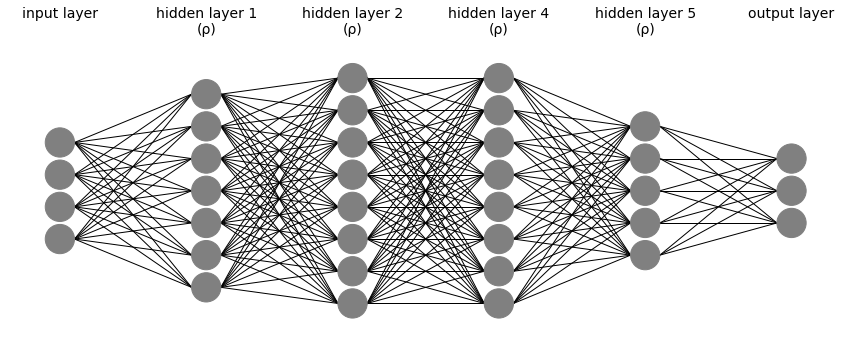

(<Figure size 1080x3600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3fb8df09d0>)

In [ ]:
from nnv import NNV

# Let's increase the size of the plot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,50)


layers_list = [
    {"title":"input layer\n", "units": 4,"edges_color":"black","edges_width":1},
    {"title":"hidden layer 1\n(\N{greek small letter rho})","edges_color":"black", "units": 7,"edges_width":1},
    {"title":"hidden layer 2\n(\N{greek small letter rho})", "edges_color":"black", "units": 8,"edges_width":1},
    #{"title":"Dropout\n(0.5)", "units": 75, "color":"lightGray"},
    {"title":"hidden layer 4\n(\N{greek small letter rho})", "edges_color":"black", "units": 8,"edges_width":1},
    {"title":"hidden layer 5\n(\N{greek small letter rho})", "edges_color":"black", "units": 5,"edges_width":1},
    #{"title":"hidden 6\n(relu)",  "units": 4},
    {"title":"output layer\n", "units": 3, "edges_color":"black"},
]


NNV(layers_list, max_num_nodes_visible=8, node_radius=5, spacing_layer=40, font_size=14).render(save_to_file="my_example_2.pdf")


**Definition [2, Def. 3.1, p.2]** Let $\rho: \mathbb{R}\rightarrow\mathbb{R}$ and $n, m, k\in \mathbb{N}$. Then let $\mathcal{NN}_{n,m,k}^\rho$ represents the class of functions
$\mathbb{R}^n\rightarrow\mathbb{R}^m$ described by feedforward neural networks with $n$ neurons in the input layer, $m$ neurons
in the output layer, and an arbitrary number of hidden layers, each with $k$ neurons with activation
function $\rho$. Every neuron in the output layer has the identity activation function.

**Theorem [2, Thm 3.2, p.2]** Let $\rho: \mathbb{R}\rightarrow\mathbb{R}$ be any nonaffine continuous function which is continuously differentiable at at least one point, with nonzero derivative at that point. Let $K \subset \mathbb{R}^n$ be compact. Then $\mathcal{NN}_{n,m,n+m+2}^\rho$ is dense in $\mathcal{C}(K; \mathbb{R}^m)$ with respect to the uniform norm.



The previous theorem is a kind of universal approximation theorem. Applying this theorem to the solution $u$ of the problem (1), states that for all $\varepsilon > 0$, there exists a function $u_h \in \mathcal{NN}_{1,1,4}^\rho$ such that

$$ \|\mathcal{F}u_h - u_h\|_{\infty} < \varepsilon.$$



**The proposed algorithm:**

  - Choose $\varepsilon > 0$. Choose $u_h$ in $\mathcal{NN}_{1,1,4}^\rho$ with $\rho(x) = \frac{1}{1+ e^{-x}}$.
  - Calculate $\mathcal{F}u_h$.
  - Evaluate $e = \|\mathcal{F}u_h - u_h\|_{\infty}$.
    - if $e \leq \varepsilon $ stop.
    - Otherwise update the weights and bias of the function $u$ via the backpropagation process.




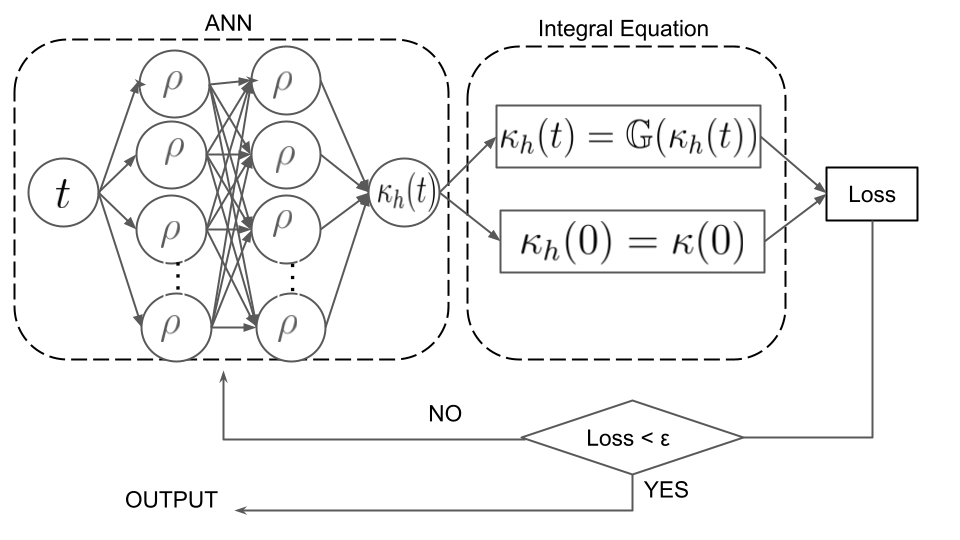

## Example 1.(Example 6 in the article)

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy.special import gamma
from scipy.integrate import quad
from scipy import interpolate
import scipy as sc
from scipy.special import gamma
from scipy.interpolate import interp1d
from math import pi, sqrt
## check if GPU is available and use it; otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
#X = torch.Tensor(np.linspace(0, 2, 100)[:, None])
X = torch.Tensor(np.linspace(0, 1, 10)).reshape(10,1)

In [ ]:
# definition of problem functions
phi = lambda x: 1-np.exp(-x)-(1/2-2/np.exp(1))*x
phi1 = lambda x: -np.exp(-x)
phi2 = lambda x: 1-(1/2-2/np.exp(1))*x
f = lambda u,v: u+v
theta=lambda t: t
psi=lambda x: x
K = lambda t,x: psi(x)*theta(t)
# solution exacte
ue=lambda t:1-np.exp(-t)
# constants and parameters
alpha=2
d0 = 0;d1=1;lmbda0=1;lmbda1=1;mu=0;a=0;b=1
Gm = lambda x:gamma(x)

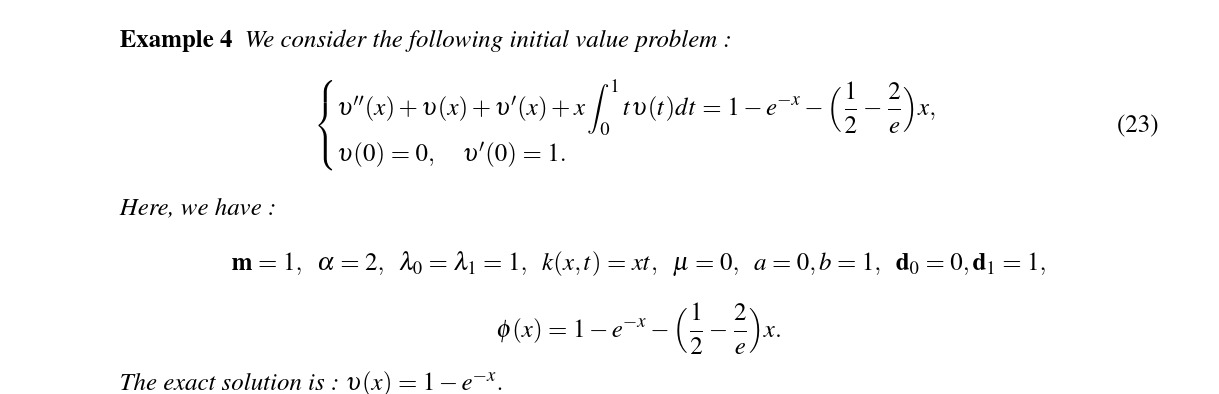

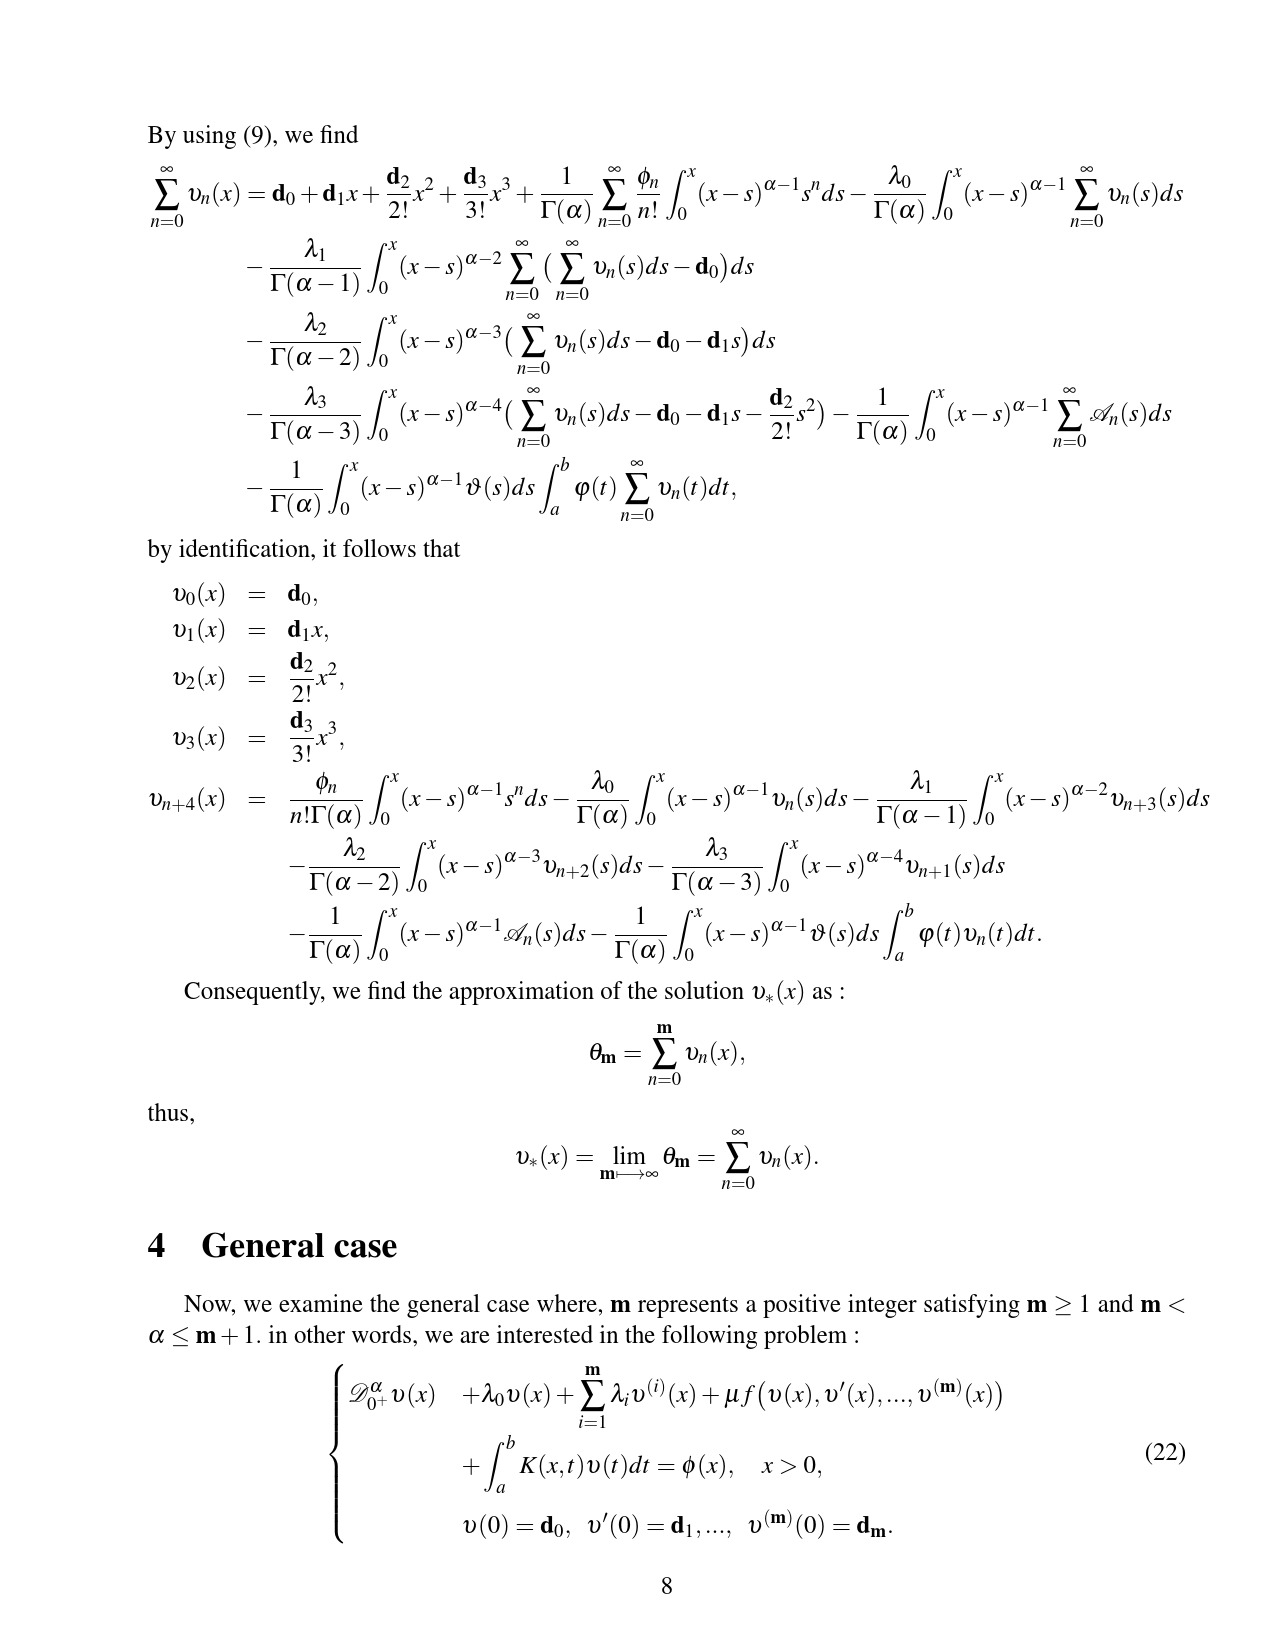

\begin{align}
\int_0^ts^{p-1}(t-s)^{q-1}f(s)ds &= \left(  \frac{t}{2} \right) ^{p+q-1} \int_{-1}^1 (1 + s)^{p-1} (1 - s )^{q-1} f\left( \frac{t}{2}(s+1)\right) ds\notag\\
&\approx \left(  \frac{t}{2} \right) ^{p+q-1}\sum_{i=1}^{n}\omega(x_i) f\left( \frac{t}{2}(x_i+1)\right).
\end{align}

### Approximation via Adomian method

In [ ]:
# Approximation of the integrals via Gauss-Jacobi quadrature cited below
quad_deg =20;p=1;q=alpha
quad_x, _ = sc.special.roots_jacobi(quad_deg,q-1,p-1)
quad_w= lambda p,q:sc.special.roots_jacobi(quad_deg,q-1,p-1)[1]
Ipq=lambda t,v,p,q: (t/2)**(p+q-1)*sum(np.array([v(t/2*(quad_x[i]+1)) for i in range(quad_deg)])*quad_w(p,q))
# Initial function terms
v_0 = lambda t: d0 #+d1*t + (1/Gm(alpha))*Ipq(t,phi2,p,q)
v_1 = lambda t: (1/Gm(alpha))*Ipq(t,phi,p,q) +d1*t
def F(t,v0,v1):
    #I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t:-(lmbda0/(Gm(alpha)))*Ipq(t,v0,1,alpha)
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*Ipq(t,v1,1,alpha-1)
    g = lambda t: theta(t)*quad(lambda s: psi(s)*v0(s),0,1)[0]
    I4 = lambda t:-(1/Gm(alpha))*Ipq(t,g,1,alpha)
    v2 = lambda t: I2(t) + I3(t) + I4(t)
    return v2(t)

\begin{align}
\int_0^ts^{p-1}(t-s)^{q-1}f(s)ds &= \left(  \frac{t}{2} \right) ^{p+q-1} \int_{-1}^1 (1 + s)^{p-1} (1 - s )^{q-1} f\left( \frac{t}{2}(s+1)\right) ds\notag\\
&\approx \left(  \frac{t}{2} \right) ^{p+q-1}\sum_{i=1}^{n}\omega(x_i) f\left( \frac{t}{2}(x_i+1)\right).
\end{align}

In [ ]:
# Computation of u1=v0+v1 such that the solution u=v0+v1+v2+v3+.....
u1 =  lambda t: v_0(t) + v_1(t)

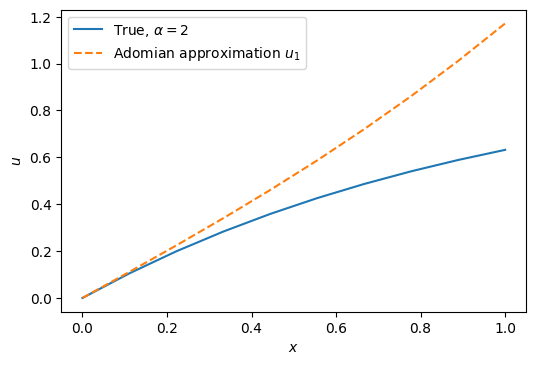

In [ ]:
xx = np.linspace(0, 1, 10)#[:, None]
U_1=[u1(xx[i]) for i in range(10)]
#with torch.no_grad():
 #   yy = Uad(torch.Tensor(xx)).numpy()
ue = lambda t:1-np.exp(-t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, ue(xx), label=r'True, $\alpha=2$')
ax.plot(xx, U_1,'--', label=r'Adomian approximation $u_1$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
v_2 = lambda t:F(t,v_0,v_1)
u2 = lambda t: u1(t) + v_2(t)

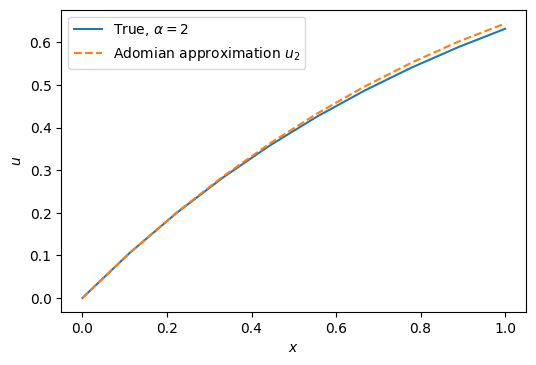

In [ ]:
xx = np.linspace(0, 1, 10)#[:, None]
U_2=[u2(xx[i]) for i in range(10)]
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:1-np.exp(-t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=2$')
ax.plot(xx, U_2,'--', label=r'Adomian approximation $u_2$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
v_3 = lambda t:F(t,v_1,v_2)
u3 = lambda t: u2(t) + v_3(t)

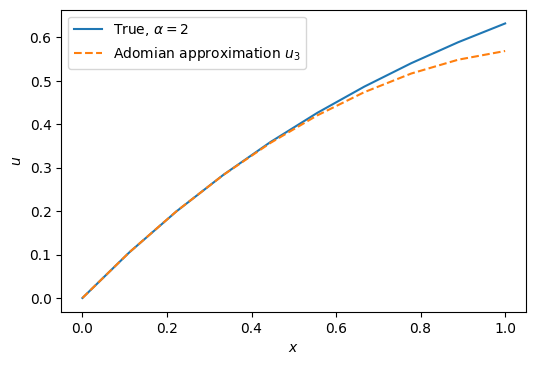

In [ ]:
xx = np.linspace(0, 1, 10)#[:, None]
U_3=[u3(xx[i]) for i in range(10)]
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:1-np.exp(-t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha= 2$')
ax.plot(xx, U_3,'--', label=r'Adomian approximation $u_3$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
v_4 = lambda t:F(t,v_2,v_3)
u4 = lambda t: u3(t) + v_4(t)

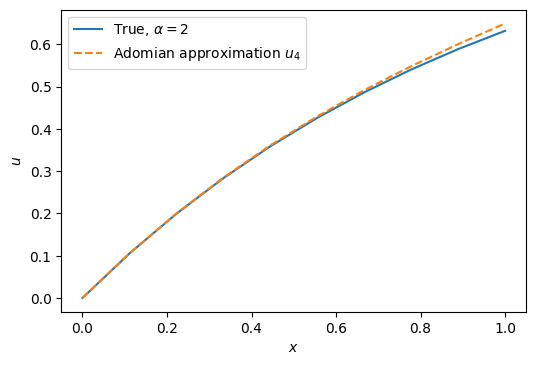

In [ ]:
xx = np.linspace(0, 1, 10)#[:, None]
U_4=[u4(xx[i]) for i in range(10)]
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:1-np.exp(-t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha= 2$')
ax.plot(xx, U_4,'--', label=r'Adomian approximation $u_4$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
v_5 = lambda t:F(t,v_3,v_2)
u5 = lambda t: u4(t) + v_5(t)

In [ ]:
xx = np.linspace(0, 1, 10)#[:, None]
U_5=[u5(xx[i]) for i in range(10)]
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:1-np.exp(-t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha= 2$')
ax.plot(xx, U_5,'--', label=r'Adomian approximation $u_5$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

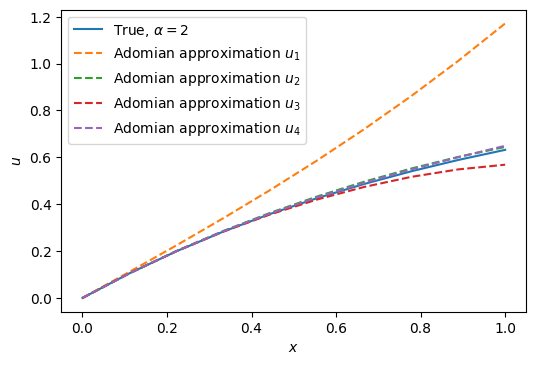

In [ ]:
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha= 2$')
ax.plot(xx, U_1,'--', label=r'Adomian approximation $u_1$')
ax.plot(xx, U_2,'--', label=r'Adomian approximation $u_2$')
ax.plot(xx, U_3,'--', label=r'Adomian approximation $u_3$')
ax.plot(xx, U_4,'--', label=r'Adomian approximation $u_4$')
#ax.plot(xx, U_5,'--', label=r'Adomian approximation $u_5$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

### ANN approximation method for example 1.

In [ ]:
# definition of the operator T = I1 + I2 + I3 + I4
def T(t,u):
    #u = lambda s: s**3 # u_0=phi
    I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t: -(lmbda0/(Gm(alpha)))*quad(lambda s,t:(t-s)**(alpha-1)*u(s),0,t,args=(t))[0]
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*(t/2)**(alpha-1)*quad(lambda s,t:(1-s)**(alpha-2)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    f = lambda t: t*quad(lambda s: s*u(s),0,1)[0]
    I4 = lambda t:-(1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*f(s),0,t,args=(t))[0]
    return d0 + d1*t + I1(t) + I2(t) + I3(t) + I4(t)

In [ ]:
N = nn.Sequential(
    nn.Linear(1,4),
    nn.Sigmoid(),
    nn.Linear(4,4),
    nn.Sigmoid(),
    nn.Linear(4,1)
    )
def loss(x):
    x.requires_grad = False
    outputs = N(x)
    pwl_spline = interpolate.splrep(X, N(X).detach().numpy())
    u_inter = lambda t:interpolate.splev(t, pwl_spline)
    Y = torch.tensor([T(X[i],u_inter) for i in range(X.shape[0])],requires_grad=True).reshape(X.shape[0],1)
    return  torch.mean((outputs - Y)**2)

optimizer = torch.optim.Adam(N.parameters(),lr=0.01)

epochs = 500
for epoch in range(epochs):
    l = loss(X)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if epoch % (epochs*0.1)==0:
       print(f'Epoch: {epoch} | Loss: {l.item()}')

Epoch: 0 | Loss: 5.997809410095215
Epoch: 50 | Loss: 0.05973690748214722
Epoch: 100 | Loss: 0.041981808841228485
Epoch: 150 | Loss: 0.041717372834682465
Epoch: 200 | Loss: 0.0414351262152195
Epoch: 250 | Loss: 0.04091505706310272
Epoch: 300 | Loss: 0.0402316153049469
Epoch: 350 | Loss: 0.039254311472177505
Epoch: 400 | Loss: 0.03775469586253166
Epoch: 450 | Loss: 0.03534414991736412


In [ ]:
def loss(x):
    x.requires_grad = False
    outputs = N(x)
    pwl_spline = interpolate.splrep(X, N(X).detach().numpy(),k=1)
    u_inter = lambda t:interpolate.splev(t, pwl_spline)
    Y = torch.tensor([T(X[i],u_inter) for i in range(X.shape[0])],requires_grad=True).reshape(X.shape[0],1)
    return  torch.mean((outputs - Y)**2)

In [ ]:
#optimizer = torch.optim.LBFGS(N.parameters())
optimizer = torch.optim.Adam(N.parameters(),lr=0.01)

In [ ]:
epochs = 200
for epoch in range(epochs):
    l = loss(X)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if epoch % (epochs*0.1)==0:
       print(f'Epoch: {epoch} | Loss: {l.item()}')

<ipython-input-99-b36d73b7de5c>:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*(t/2)**(alpha-1)*quad(lambda s,t:(1-s)**(alpha-2)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]


Epoch: 0 | Loss: 0.031440310180187225


<ipython-input-99-b36d73b7de5c>:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*(t/2)**(alpha-1)*quad(lambda s,t:(1-s)**(alpha-2)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]


Epoch: 20 | Loss: 0.019018298014998436


<ipython-input-99-b36d73b7de5c>:5: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I2 = lambda t: -(lmbda0/(Gm(alpha)))*quad(lambda s,t:(t-s)**(alpha-1)*u(s),0,t,args=(t))[0]
<ipython-input-99-b36d73b7de5c>:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I2 = lambda t: -(lmbda0/(Gm(alpha)))*quad(lambda s,t:(t-s)**(alpha-1)*u(s),0,t,args=(t))[0]


Epoch: 40 | Loss: 0.003785081673413515
Epoch: 60 | Loss: 0.00046952892444096506


<ipython-input-99-b36d73b7de5c>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  f = lambda t: t*quad(lambda s: s*u(s),0,1)[0]


Epoch: 80 | Loss: 0.00013138125359546393
Epoch: 100 | Loss: 8.97433637874201e-05
Epoch: 120 | Loss: 6.798408139729872e-05
Epoch: 140 | Loss: 5.3372517868410796e-05
Epoch: 160 | Loss: 4.7717257984913886e-05
Epoch: 180 | Loss: 4.4966938730794936e-05


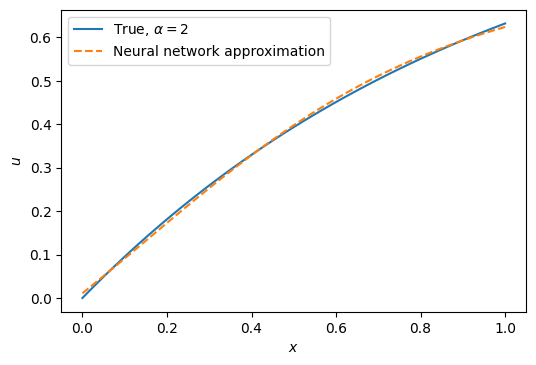

In [ ]:
xx = np.linspace(0, 1, 100)[:, None]
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = 1-np.exp(-xx)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=2$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');

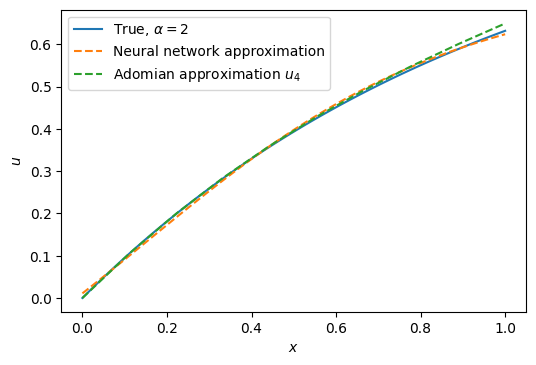

In [ ]:
xx = np.linspace(0, 1, 100)[:, None]
xxx = np.linspace(0, 1, 10)
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = 1-np.exp(-xx)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=2$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.plot(xxx, U_4,'--', label=r'Adomian approximation $u_4$')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');

## Example 2.(Example 7 in the article)

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy.special import gamma
from scipy.integrate import quad
from scipy import interpolate
import scipy as sc
from scipy.special import gamma
from scipy.interpolate import interp1d
from math import pi, sqrt
## check if GPU is available and use it; otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

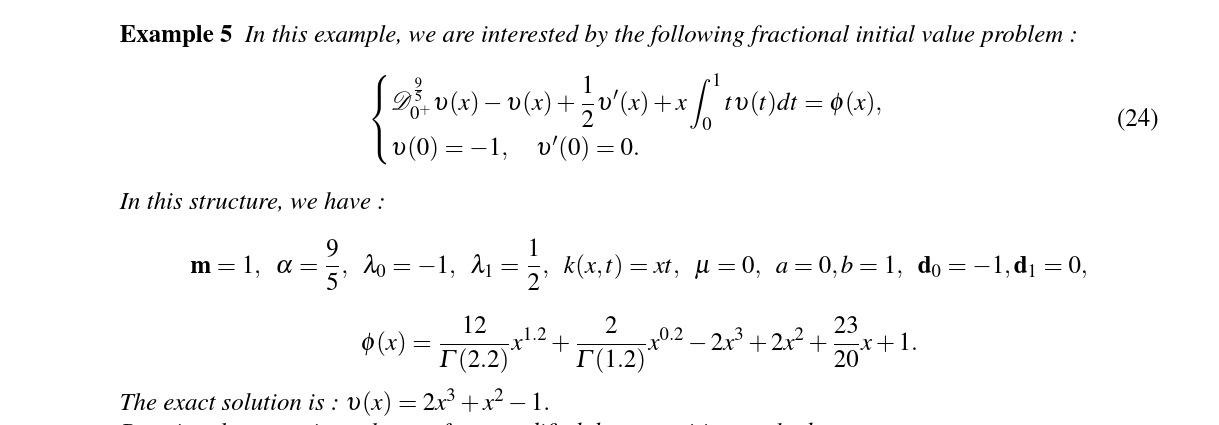

In [ ]:
#X = torch.Tensor(np.linspace(0, 2, 100)[:, None])
X = torch.Tensor(np.linspace(0, 1, 100)).reshape(100,1)

In [ ]:
# definition of problem functions
Gm = lambda x:gamma(x)
phi = lambda x: 12/Gm(2.2)*x**(1.2)+ 2/Gm(1.2)*x**(0.2)-2*x**3+2*x**2+23/20*x+1
#h = lambda t,x: 1/4*x + (gamma(2.5)/gamma(1.25))*(t**(1/2)) - 1/4*t**3
K = lambda t,x: x*t
# constants and parameters
alpha=9/5
d0 = -1;d1=0;lmbda0=-1;lmbda1=1/2;mu=0;a=0;b=1

### Adomian method for example 2.

In [ ]:
# Approximation of the integrals via Gauss-Jacobi quadrature
quad_deg =20;p=1;q=alpha
quad_x, _ = sc.special.roots_jacobi(quad_deg,q-1,p-1)
quad_w= lambda p,q:sc.special.roots_jacobi(quad_deg,q-1,p-1)[1]
Ipq=lambda t,v,p,q: (t/2)**(p+q-1)*sum(np.array([v(t/2*(quad_x[i]+1)) for i in range(quad_deg)])*quad_w(p,q))
# Initial function terms
v_0 = lambda t: d0+d1*t
v_1 = lambda t: (1/Gm(alpha))*Ipq(t,phi,p,q)
def F(t,v0,v1):
    #I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t:-(lmbda0/(Gm(alpha)))*Ipq(t,v0,1,alpha)
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*Ipq(t,v1,1,alpha-1)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    g = lambda t: t*quad(lambda s: s*v0(s),0,1)[0]
    I4 = lambda t:-(1/Gm(alpha))*Ipq(t,g,1,alpha)
    v2 = lambda t: I2(t) + I3(t) + I4(t)
    return v2(t)

\begin{align}
\int_0^ts^{p-1}(t-s)^{q-1}f(s)ds &= \left(  \frac{t}{2} \right) ^{p+q-1} \int_{-1}^1 (1 + s)^{p-1} (1 - s )^{q-1} f\left( \frac{t}{2}(s+1)\right) ds\notag\\
&\approx \left(  \frac{t}{2} \right) ^{p+q-1}\sum_{i=1}^{n}\omega(x_i) f\left( \frac{t}{2}(x_i+1)\right).
\end{align}

In [ ]:
# Computation of u1=v0+v1 such that the solution u=v0+v1+v2+v3+.....
u1 =  lambda t: v_0(t) + v_1(t)

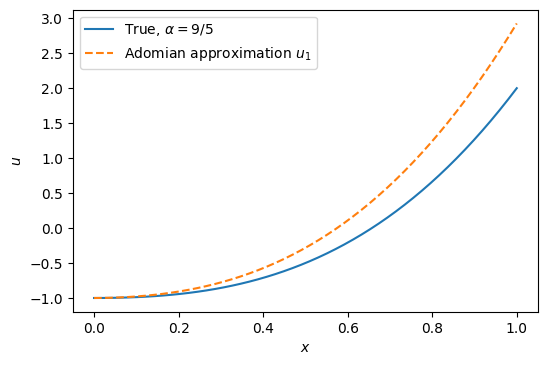

In [ ]:
xx = np.linspace(0, 1, 50)#[:, None]
U_1=[u1(xx[i]) for i in range(50)]
#with torch.no_grad():
 #   yy = Uad(torch.Tensor(xx)).numpy()
yt = lambda t:2*t**3+t**2-1
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha= 9/5$')
ax.plot(xx, U_1,'--', label=r'Adomian approximation $u_1$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
v_2 = lambda t:F(t,v_0,v_1)
u2 = lambda t: u1(t) + v_2(t)

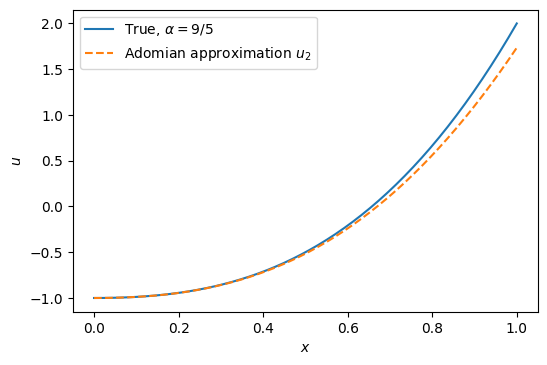

In [ ]:
xx = np.linspace(0, 1, 50)#[:, None]
U_2=[u2(xx[i]) for i in range(50)]
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:2*t**3+t**2-1
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha= 9/5$')
ax.plot(xx, U_2,'--', label=r'Adomian approximation $u_2$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
v_3 = lambda t:F(t,v_1,v_2)
u3 = lambda t: u2(t) + v_3(t)

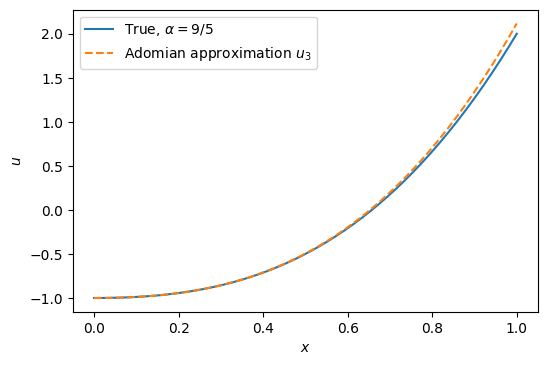

In [ ]:
xx = np.linspace(0, 1, 50)#[:, None]
U_3=[u3(xx[i]) for i in range(50)]
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:2*t**3+t**2-1
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha= 9/5$')
ax.plot(xx, U_3,'--', label=r'Adomian approximation $u_3$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
v_4 = lambda t:F(t,v_2,v_3)
u4 = lambda t: u3(t) + v_4(t)

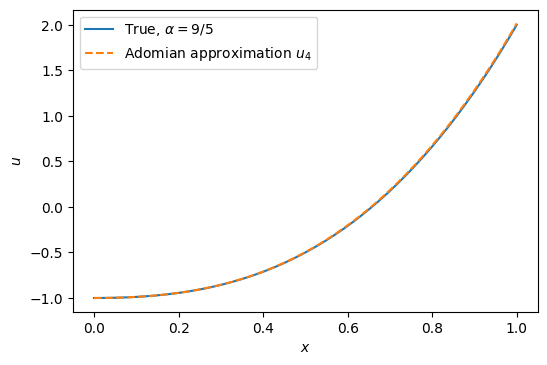

In [ ]:
xx = np.linspace(0, 1, 50)#[:, None]
U_4=[u4(xx[i]) for i in range(50)]
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:2*t**3+t**2-1
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha= 9/5$')
ax.plot(xx, U_4,'--', label=r'Adomian approximation $u_4$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

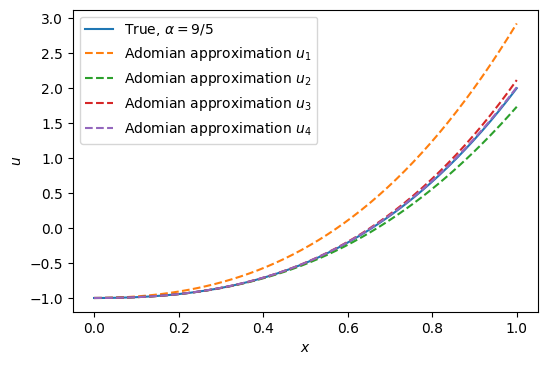

In [ ]:
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha= 9/5$')
ax.plot(xx, U_1,'--', label=r'Adomian approximation $u_1$')
ax.plot(xx, U_2,'--', label=r'Adomian approximation $u_2$')
ax.plot(xx, U_3,'--', label=r'Adomian approximation $u_3$')
ax.plot(xx, U_4,'--', label=r'Adomian approximation $u_4$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
for n in range(2):
    v_2 = lambda t:T(t,v_0,v_1)
    Uad1 = lambda t: Uad(t) + v_2(t)
    v_0 = lambda t:v_1(t)
    v_1 = lambda t:v_2(t)
    Uad= lambda t: Uad1(t)


In [ ]:
xx = np.linspace(0, 1, 100)[:, None]

#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:2*t**3+t**2-1
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label='True, alpha= ')
ax.plot(xx, Uad(xx),'--', label='Adomian approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');

### ANN method for example 2

In [ ]:
# Approximation of the integrals via Gauss-Jacobi quadrature
quad_deg =20;p=1;q=alpha
quad_x, _ = sc.special.roots_jacobi(quad_deg,q-1,p-1)
quad_w= lambda p,q:sc.special.roots_jacobi(quad_deg,q-1,p-1)[1]
Ipq=lambda t,v,p,q: (t/2)**(p+q-1)*np.sum(np.array([v(t/2*(quad_x[i]+1)) for i in range(quad_deg)])*quad_w(p,q))

In [ ]:
# definition of the operator T = I1 + I2 + I3 + I4
def T(t,u):
    d_0=lambda t: d0
    I1 = lambda t: (1/Gm(alpha))*Ipq(t,phi,1,alpha)
    I2 = lambda t: -(lmbda0/(Gm(alpha)))*Ipq(t,u,1,alpha)
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*(Ipq(t,u,1,alpha-1)-Ipq(t,d_0,1,alpha-1))
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    g = lambda t: t*quad(lambda s: s*u(s),0,1)[0]
    I4 = lambda t:-(1/Gm(alpha))*Ipq(t,g,1,alpha)
    return d0 + d1*t + I1(t) + I2(t) + I3(t) + I4(t)

In [ ]:
# definition of the operator T = I1 + I2 + I3 + I4
def T(t,u):
    I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t: -(lmbda0/(Gm(alpha)))*quad(lambda s,t:(t-s)**(alpha-1)*u(s),0,t,args=(t))[0]
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*(t/2)**(alpha-1)*quad(lambda s,t:(1-s)**(alpha-2)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    f = lambda t: t*quad(lambda s: s*u(s),0,1)[0]
    I4 = lambda t:-(1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*f(s),0,t,args=(t))[0]
    return d0 + d1*t + I1(t) + I2(t) + I3(t) + I4(t)

In [ ]:
X = torch.Tensor(np.linspace(0, 1, 10)).reshape(10,1)

In [ ]:
N = nn.Sequential(
    nn.Linear(1,4),
    nn.Sigmoid(),
    nn.Linear(4,4),
    nn.Sigmoid(),
    nn.Linear(4,1)
    )
def loss(x):
    x.requires_grad = False
    outputs = N(x)
    pwl_spline = interpolate.splrep(X, N(X).detach().numpy())
    u_inter = lambda t:interpolate.splev(t, pwl_spline)
    Y = torch.tensor([T(X[i],u_inter) for i in range(X.shape[0])],requires_grad=True).reshape(X.shape[0],1)
    return  torch.mean((outputs - Y)**2)

optimizer = torch.optim.Adam(N.parameters(),lr=0.05)

epochs = 100
for epoch in range(epochs):
    l = loss(X)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if epoch % (epochs*0.1)==0:
       print(f'Epoch: {epoch} | Loss: {l.item()}')

<ipython-input-22-d01ce52abbbc>:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]


Epoch: 0 | Loss: 1.4054901599884033
Epoch: 10 | Loss: 1.2585208415985107
Epoch: 20 | Loss: 1.1334222555160522
Epoch: 30 | Loss: 0.6507667303085327


<ipython-input-22-d01ce52abbbc>:5: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*(t/2)**(alpha-1)*quad(lambda s,t:(1-s)**(alpha-2)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]


Epoch: 40 | Loss: 0.15399377048015594
Epoch: 50 | Loss: 0.05028539150953293
Epoch: 60 | Loss: 0.02488483302295208
Epoch: 70 | Loss: 0.007719619665294886
Epoch: 80 | Loss: 0.0029260546434670687
Epoch: 90 | Loss: 0.0010842273477464914


In [ ]:
def loss(x):
    x.requires_grad = False
    outputs = N(x)
    pwl_spline = interpolate.splrep(X, N(X).detach().numpy(),k=1)
    u_inter = lambda t:interpolate.splev(t, pwl_spline)
    Y = torch.tensor([T(X[i],u_inter) for i in range(X.shape[0])],requires_grad=True).reshape(X.shape[0],1)
    return  torch.mean((outputs - Y)**2)

In [ ]:
#optimizer = torch.optim.LBFGS(N.parameters())
optimizer = torch.optim.Adam(N.parameters(),lr=0.05)

In [ ]:
epochs = 200
for epoch in range(epochs):
    l = loss(X)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if epoch % (epochs*0.1)==0:
       print(f'Epoch: {epoch} | Loss: {l.item()}')

<ipython-input-22-d01ce52abbbc>:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]


Epoch: 0 | Loss: 0.0008113255025818944
Epoch: 20 | Loss: 0.002272451063618064
Epoch: 40 | Loss: 0.000853896897751838
Epoch: 60 | Loss: 0.000664367398712784
Epoch: 80 | Loss: 0.0006169297266751528
Epoch: 100 | Loss: 0.0005907025770284235


<ipython-input-22-d01ce52abbbc>:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*(t/2)**(alpha-1)*quad(lambda s,t:(1-s)**(alpha-2)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]


Epoch: 120 | Loss: 0.0005679386667907238
Epoch: 140 | Loss: 0.0005489446921274066
Epoch: 160 | Loss: 0.000533083628397435
Epoch: 180 | Loss: 0.0005198965081945062


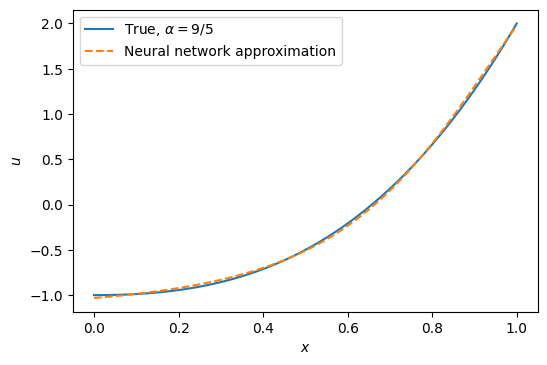

In [ ]:
xx = np.linspace(0, 1, 100)[:, None]
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = 2*xx**3+xx**2-1
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=9/5$')
ax.plot(xx, yy,'--', label=r'Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');

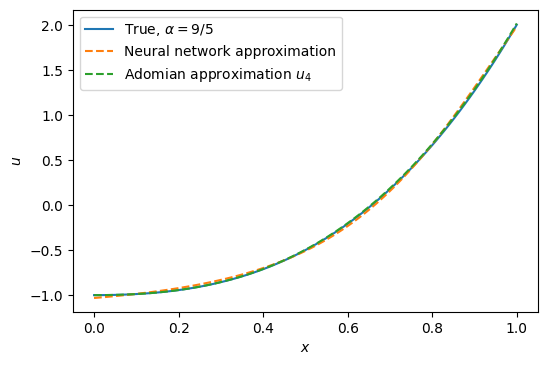

In [ ]:
xx = np.linspace(0, 1, 100)[:, None]
xxx = np.linspace(0, 1, 50)
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = 2*xx**3+xx**2-1
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=9/5$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.plot(xxx, U_4,'--', label=r'Adomian approximation $u_4$')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');

## Example 3.(Example 8 in the article)

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy.special import gamma
from scipy.integrate import quad
from scipy import interpolate
import scipy as sc
from scipy.special import gamma
from scipy.interpolate import interp1d
from math import pi, sqrt
import tensorflow as tf

## check if GPU is available and use it; otherwise use CPU
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
#X = torch.Tensor(np.linspace(0, 2, 100)[:, None])
X = torch.Tensor(np.linspace(0, 1, 10)).reshape(10,1)

In [ ]:
# definition of problem functions
Gm = lambda x: gamma(x)
phi = lambda x: 2.+(np.pi-2)/4*np.sin(x)
f = lambda u,v: u**2+v**2
K = lambda x,t: np.sin(x)*np.cos(t)
ue = lambda x: -np.sin(x)+np.cos(x)
due = lambda x: -np.sin(x)-np.cos(x)
# constants and parameters
alpha=3
d0 =1.;d1=-1;d2=-1;lmbda0=0.;lmbda1=1.;lmbda2=0.;mu=1.;a=0.;b=np.pi/2


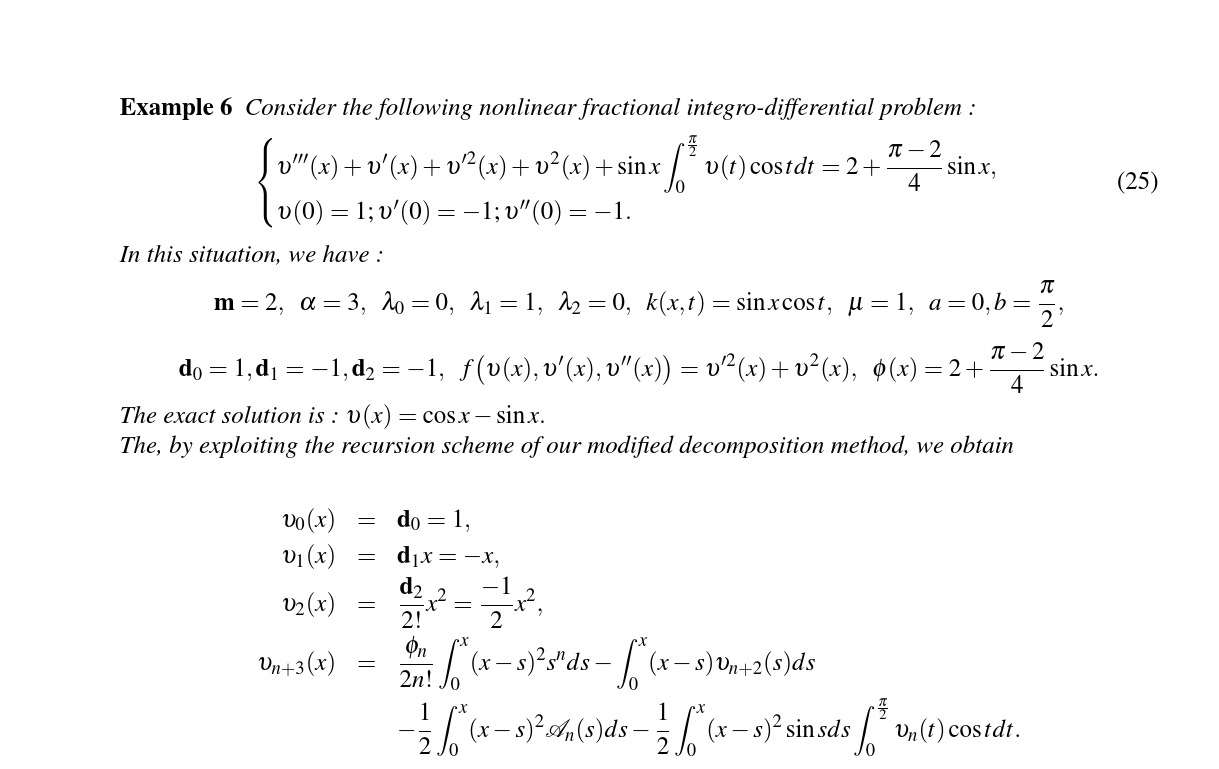

### Approximation via Adomian method

In [ ]:
import autograd.numpy as np
from autograd import grad

In [ ]:
from tensorflow.python.ops.variable_scope import variable_creator_scope_v1
# Approximation of the integrals via Gauss-Jacobi quadrature
quad_deg =50;p=1;q=alpha
quad_x, _ = sc.special.roots_jacobi(quad_deg,q-1,p-1)
quad_w= lambda p,q:sc.special.roots_jacobi(quad_deg,q-1,p-1)[1]
Ipq=lambda t,v,p,q: (t/2)**(p+q-1)*sum(np.array([v(t/2*(quad_x[i]+1)) for i in range(quad_deg)])*quad_w(p,q))
# Initial function terms
v_0 = lambda t: d0 + 0*t
v_1 = lambda t: (d2/2)*t**2+ d1*t
v_2 = lambda t: (1/Gm(alpha))*Ipq(t,phi,p,q)
#A0= lambda v0:v0**2
#A1= lambda v0,v1:2*v0*v1


\begin{align}
\int_0^ts^{p-1}(t-s)^{q-1}f(s)ds &= \left(  \frac{t}{2} \right) ^{p+q-1} \int_{-1}^1 (1 + s)^{p-1} (1 - s )^{q-1} f\left( \frac{t}{2}(s+1)\right) ds\notag\\
&\approx \left(  \frac{t}{2} \right) ^{p+q-1}\sum_{i=1}^{n}\omega(x_i) f\left( \frac{t}{2}(x_i+1)\right).
\end{align}

In [ ]:
# Computation of u1=v0+v1 such that the solution u=v0+v1+v2+v3+.....
u1 =  lambda t: v_0(t) + v_1(t)

In [ ]:
xx = np.linspace(0, 1, 50)#[:, None]
U_1=[u1(xx[i]) for i in range(50)]

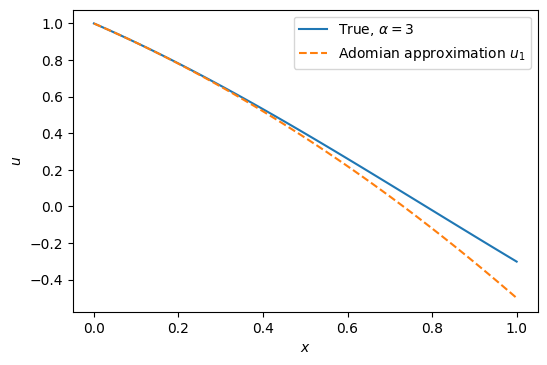

In [ ]:
#with torch.no_grad():
 #   yy = Uad(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=3$')
ax.plot(xx, U_1,'--', label=r'Adomian approximation $u_1$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
# Computation of u2=v0+v1+v2 such that the solution u=v0+v1+v2+v3+.....
u2 =  lambda t: v_0(t) + v_1(t) + v_2(t)

In [ ]:
xx = np.linspace(0, 1, 50)#[:, None]
U_2=[u2(xx[i]) for i in range(50)]

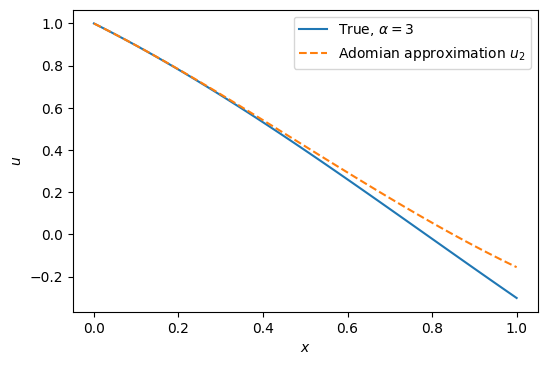

In [ ]:
#with torch.no_grad():
 #   yy = Uad(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha= 3$')
ax.plot(xx, U_2,'--', label=r'Adomian approximation $u_2$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
def F0(t,v0,v1,v2):
    dv0 = grad(v0)
    A0 = lambda t: (v0(t))**2 + (dv0(t))**2
    #I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t:-(lmbda0/(Gm(alpha)))*Ipq(t,v0,1,alpha)
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*Ipq(t,v1,1,alpha-1)
    I4 = lambda t: -(lmbda2/(Gm(alpha-2)))*Ipq(t,v2,1,alpha-2)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    g = lambda t: np.sin(t)*quad(lambda s: np.cos(s)*v0(s),0,np.pi/2)[0]
    I5 = lambda t:-(1/Gm(alpha))*Ipq(t,g,1,alpha)
    I6= lambda t: -(mu/(Gm(alpha)))*Ipq(t,A0,1,alpha)
    v3 = lambda t: I2(t) + I3(t) + I4(t)+ I5(t) + I6(t)
    return v3(t)

In [ ]:
v_3 = lambda t:F0(t,v_0,v_1,v_2)
u3 = lambda t: u2(t) + v_3(t)

In [ ]:
xx = np.linspace(0, 1, 50)#[:, None]
U_3=[u3(xx[i]) for i in range(50)]

/usr/local/lib/python3.8/dist-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


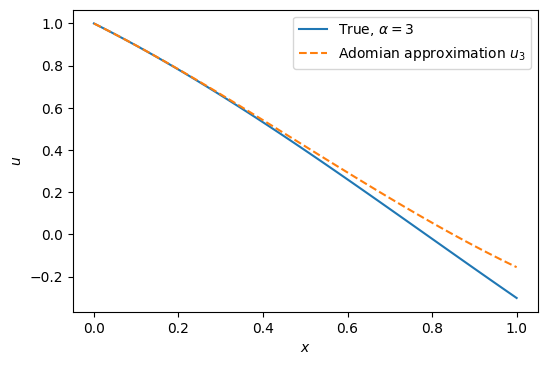

In [ ]:
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=3$')
ax.plot(xx, U_2,'--', label=r'Adomian approximation $u_3$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
def F1(t,v1,v2,v3):
    dv0=grad(v_0)
    dv1=grad(v_1)
    A1 = lambda t: 2*v_0(t)*v_1(t) + 2*(dv0(t))*(dv1(t))
    #I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t:-(lmbda0/(Gm(alpha)))*Ipq(t,v1,1,alpha)
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*Ipq(t,v2,1,alpha-1)
    I4 = lambda t: -(lmbda2/(Gm(alpha-2)))*Ipq(t,v3,1,alpha-2)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    g = lambda t: np.sin(t)*quad(lambda s: np.cos(s)*v1(s),0,np.pi/2)[0]
    I5 = lambda t:-(1/Gm(alpha))*Ipq(t,g,1,alpha)
    I6= lambda t: -(mu/(Gm(alpha)))*Ipq(t,A1,1,alpha)
    v4 = lambda t: I2(t) + I3(t) + I4(t)+ I5(t) + I6(t)
    return v4(t)

In [ ]:
v_4 = lambda t:F1(t,v_1,v_2,v_3)
u4 = lambda t: u3(t) + v_4(t)

In [ ]:
xx = np.linspace(0, 1, 50)#[:, None]
U_4=[u4(xx[i]) for i in range(50)]

/usr/local/lib/python3.8/dist-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


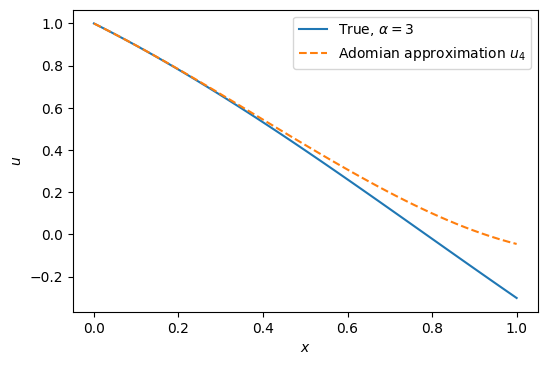

In [ ]:
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=3$')
ax.plot(xx, U_4,'--', label=r'Adomian approximation $u_4$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
def F2(t,v1,v2,v3):
    dv0=grad(v_0)
    dv1=grad(v_1)
    dv2=grad(v_2)
    A2 = lambda t: 2*v_0(t)*v_2(t)+v_1(t)**2 + 2*dv0(t)*dv2(t)+dv1(t)**2
    #I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t:-(lmbda0/(Gm(alpha)))*Ipq(t,v1,1,alpha)
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*Ipq(t,v2,1,alpha-1)
    I4 = lambda t: -(lmbda2/(Gm(alpha-2)))*Ipq(t,v3,1,alpha-2)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    g = lambda t: np.sin(t)*quad(lambda s: np.cos(s)*v1(s),0,np.pi/2)[0]
    I5 = lambda t:-(1/Gm(alpha))*Ipq(t,g,1,alpha)
    I6= lambda t: -(mu/(Gm(alpha)))*Ipq(t,A2,1,alpha)
    v4 = lambda t: I2(t) + I3(t) + I4(t)+ I5(t) + I6(t)
    return v4(t)

In [ ]:
v_5 = lambda t:F2(t,v_2,v_3,v_4)
u5 = lambda t: u4(t) + v_5(t)

In [ ]:
xx = np.linspace(0, 1, 50)#[:, None]
U_5=[u5(xx[i]) for i in range(50)]

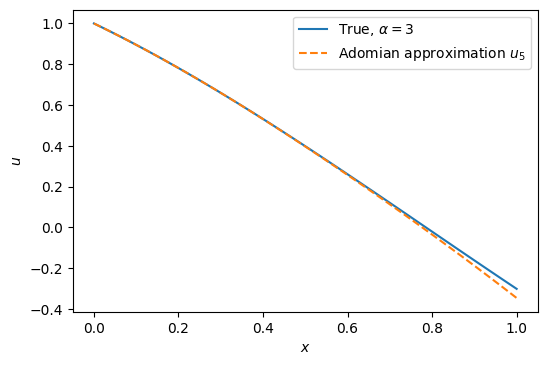

In [ ]:
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=3$')
ax.plot(xx, U_5,'--', label=r'Adomian approximation $u_5$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
def F3(t,v1,v2,v3):
    dv0=grad(v_0)
    dv1=grad(v_1)
    dv2=grad(v_2)
    dv3=grad(v_3)
    A3 = lambda t: 2*v_0(t)*v_3(t)+2*v_1(t)*v_2(t) + 2*dv0(t)*dv3(t)+2*dv1(t)*dv2(t)
    #I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t:-(lmbda0/(Gm(alpha)))*Ipq(t,v1,1,alpha)
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*Ipq(t,v2,1,alpha-1)
    I4 = lambda t: -(lmbda2/(Gm(alpha-2)))*Ipq(t,v3,1,alpha-2)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    g = lambda t: np.sin(t)*quad(lambda s: np.cos(s)*v1(s),0,np.pi/2)[0]
    I5 = lambda t:-(1/Gm(alpha))*Ipq(t,g,1,alpha)
    I6= lambda t: -(mu/(Gm(alpha)))*Ipq(t,A3,1,alpha)
    v4 = lambda t: I2(t) + I3(t) + I4(t)+ I5(t) + I6(t)
    return v4(t)

In [ ]:
v_6 = lambda t:F3(t,v_3,v_4,v_5)
u6 = lambda t: u5(t) + v_6(t)

In [ ]:
xx = np.linspace(0, 1, 50)#[:, None]
U_6=[u6(xx[i]) for i in range(50)]

In [ ]:
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=3$')
ax.plot(xx, U_6,'--', label=r'Adomian approximation $u_6$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=3$')
ax.plot(xx, U_1,'--', label=r'Adomian approximation $u_1$')
ax.plot(xx, U_2,'--', label=r'Adomian approximation $u_2$')
ax.plot(xx, U_3,'--', label=r'Adomian approximation $u_3$')
ax.plot(xx, U_4,'--', label=r'Adomian approximation $u_4$')
ax.plot(xx, U_5,'--', label=r'Adomian approximation $u_5$')
ax.plot(xx, U_6,'--', label=r'Adomian approximation $u_6$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

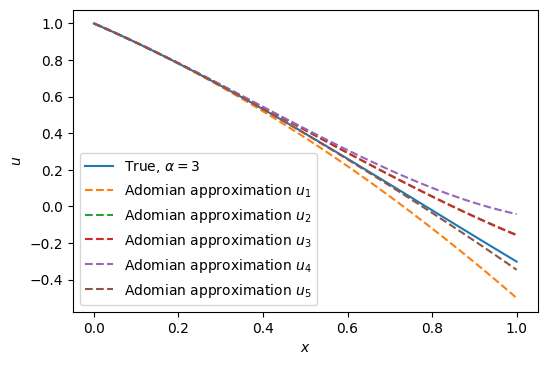

In [ ]:
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=3$')
ax.plot(xx, U_1,'--', label=r'Adomian approximation $u_1$')
ax.plot(xx, U_2,'--', label=r'Adomian approximation $u_2$')
ax.plot(xx, U_3,'--', label=r'Adomian approximation $u_3$')
ax.plot(xx, U_4,'--', label=r'Adomian approximation $u_4$')
ax.plot(xx, U_5,'--', label=r'Adomian approximation $u_5$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

### Approximation via ANN method

In [ ]:
# definition of the operator T = I1 + I2 + I3 + I4
def F(t,u,v):
    d_0=lambda t:d0
    d_1=lambda t:d1/2*(t+1)
    I1 = lambda t: (1/Gm(alpha))*Ipq(t,phi,1,alpha)
    I2 = lambda t: -(lmbda0/(Gm(alpha)))*Ipq(t,u,1,alpha)
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*(Ipq(t,u,1,alpha-1)-Ipq(t,d_0,1,alpha-1))
    I4 = lambda t: -lmbda2/Gm(alpha-2)*(Ipq(t,u,1,alpha-2)-Ipq(t,d_0,1,alpha-2)-Ipq(t,d_1,1,alpha-2))
    #I41 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-1)*quad(lambda s,t:(1-s)**(alpha-3)*(-d1*(s+1)),-1,1,args=(t))[0]
    g = lambda t: np.sin(t)*quad(lambda s: np.cos(s)*u(s),0,np.pi/2)[0]
    I5 = lambda t:-(1/Gm(alpha))*Ipq(t,g,1,alpha)
    I6 = lambda t:-(mu/Gm(alpha))*Ipq(t,f(u,v),1,alpha)
    return d0 + d1*t + d2/2*t**2+ I1(t) + I2(t) + I3(t) + I4(t)  + I5(t) + I6(t)

In [ ]:
# definition of the operator T = I1 + I2 + I3 + I4
def T(t,u,v):
    I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t: -(lmbda0/(Gm(alpha)))*quad(lambda s,t:(t-s)**(alpha-1)*u(s),0,t,args=(t))[0]
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    I4 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-2)*quad(lambda s,t:(1-s)**(alpha-3)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]
    I41 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-2)*quad(lambda s,t:(1-s)**(alpha-3)*(-d1*(s+1)),-1,1,args=(t))[0]
    g = lambda t: np.sin(t)*quad(lambda s: np.cos(s)*u(s),0,np.pi/2)[0]
    I5 = lambda t:-(1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*g(s),0,t,args=(t))[0]
    I6 = lambda t:-(mu/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*f(u(s),v(s)),0,t,args=(t))[0]
    return d0 + d1*t + d2/2*t**2+ I1(t) + I2(t) + I3(t) + I4(t) + I41(t)  + I5(t) + I6(t)

Epoch: 0 | Loss: 0.556611180305481
Epoch: 50 | Loss: 0.09646271914243698
Epoch: 100 | Loss: 0.09150827676057816
Epoch: 150 | Loss: 0.08436374366283417
Epoch: 200 | Loss: 0.06756635010242462
Epoch: 250 | Loss: 0.03646012395620346
Epoch: 300 | Loss: 0.013308718800544739
Epoch: 350 | Loss: 0.005208658054471016


<ipython-input-125-3e26654b2c44>:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I6 = lambda t:-(mu/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*f(u(s),v(s)),0,t,args=(t))[0]


Epoch: 400 | Loss: 0.0017895668279379606
Epoch: 450 | Loss: 0.001234023948200047


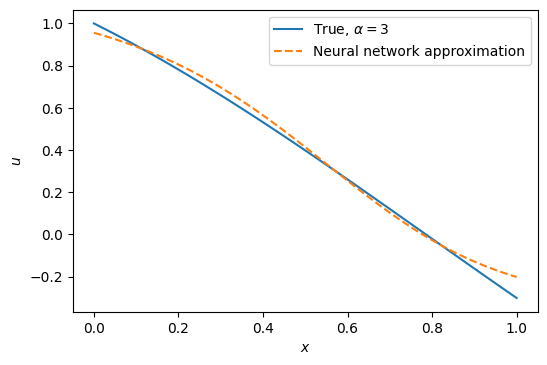

In [ ]:
N = nn.Sequential(
    nn.Linear(1,4),
    nn.Sigmoid(),
    nn.Linear(4,4),
    nn.Sigmoid(),
    nn.Linear(4,1)
    )
def loss(x):
    x.requires_grad = False
    outputs = N(x)
    pwl_spline = interpolate.splrep(X, N(X).detach().numpy())
    u_inter = lambda t:interpolate.splev(t, pwl_spline)
    du_inter = lambda t:interpolate.splev(t, pwl_spline,der=1)
    ddu_inter = lambda t:interpolate.splev(t, pwl_spline,der=2)
    Y = torch.tensor([T(X[i],u_inter,du_inter) for i in range(X.shape[0])],requires_grad=True).reshape(X.shape[0],1)
    return  torch.mean((outputs - Y)**2)

optimizer = torch.optim.Adam(N.parameters(),lr=0.01)

epochs = 500
for epoch in range(epochs):
    l = loss(X)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if epoch % (epochs*0.1)==0:
       print(f'Epoch: {epoch} | Loss: {l.item()}')

xx = np.linspace(0, 1, 100)[:, None]
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = np.cos(xx)-np.sin(xx)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=3$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');

Epoch: 0 | Loss: 0.0002394916518824175
Epoch: 30 | Loss: 0.0002538362459745258
Epoch: 60 | Loss: 0.0002100256533594802
Epoch: 90 | Loss: 0.00019872665870934725
Epoch: 120 | Loss: 0.00018521798483561724
Epoch: 150 | Loss: 0.00017130964261014014
Epoch: 180 | Loss: 0.0001570057647768408
Epoch: 210 | Loss: 0.00014266310608945787
Epoch: 240 | Loss: 0.0001285281468881294
Epoch: 270 | Loss: 0.00011479870590846986


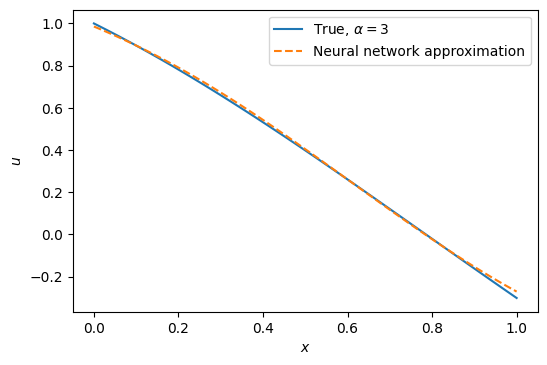

In [ ]:
optimizer = torch.optim.Adam(N.parameters(),lr=0.01)

epochs = 300
for epoch in range(epochs):
    l = loss(X)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if epoch % (epochs*0.1)==0:
       print(f'Epoch: {epoch} | Loss: {l.item()}')

xx = np.linspace(0, 1, 100)[:, None]
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = np.cos(xx)-np.sin(xx)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=3$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');

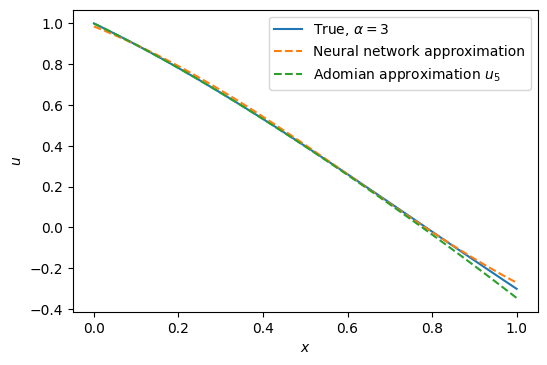

In [ ]:
xx = np.linspace(0, 1, 100)[:, None]
xxx = np.linspace(0, 1, 50)#[:, None]
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = np.cos(xx)-np.sin(xx)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=3$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.plot(xxx, U_5,'--', label=r'Adomian approximation $u_5$')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');


# Example 4.(Example 9 in the article)

In [ ]:
# Example 7 alpha=14/5

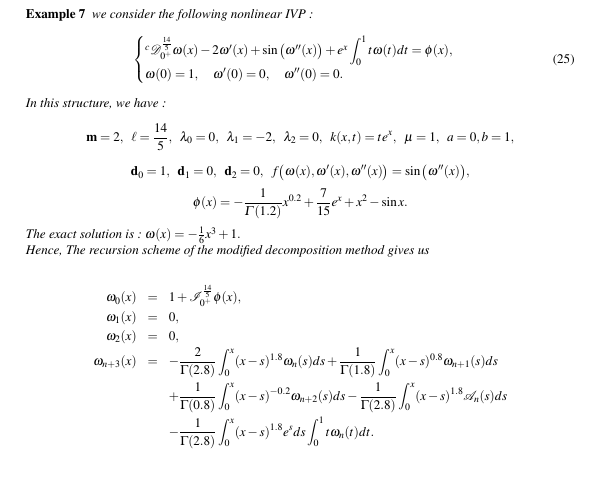

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy.special import gamma
from scipy.integrate import quad
from scipy import interpolate
import scipy as sc
from scipy.special import gamma
from scipy.interpolate import interp1d
from math import pi, sqrt
import tensorflow as tf

## check if GPU is available and use it; otherwise use CPU
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
#X = torch.Tensor(np.linspace(0, 2, 100)[:, None])
X = torch.Tensor(np.linspace(0, 1, 10)).reshape(10,1)

In [ ]:
# definition of problem functions
Gm = lambda x: gamma(x)
phi = lambda x: (-1/Gm(1.2))*x**0.2 +7/15*np.exp(x) + x**2- np.sin(x)
#phi = lambda x: (96/Gm(0.25))*x**0.25 + 16*x**6-4*x**4+16*x**3 + (245/21)*x**2-24*x-8
f = lambda v: np.sin(v)
K = lambda x,t: t*np.exp(x)
ue = lambda t: -1/6*t**3+1
due = lambda t: -1/2*t**2
ddue = lambda t: -t
# constants and parameters
alpha=14/5;m=2
d0 =1.;d1=0;d2=0;lmbda0=0.;lmbda1=-2;lmbda2=0.;mu=1.;a=0.;b=1


## Approximation via Adomian method

In [ ]:
import autograd.numpy as np
from autograd import grad

In [ ]:
from tensorflow.python.ops.variable_scope import variable_creator_scope_v1
# Approximation of the integrals via Gauss-Jacobi quadrature
quad_deg =50;p=1;q=alpha
quad_x, _ = sc.special.roots_jacobi(quad_deg,q-1,p-1)
quad_w= lambda p,q:sc.special.roots_jacobi(quad_deg,q-1,p-1)[1]
Ipq=lambda t,v,p,q: (t/2)**(p+q-1)*sum(np.array([v(t/2*(quad_x[i]+1)) for i in range(quad_deg)])*quad_w(p,q))
# Initial function terms
v_2 = lambda t:  0*t
#v_3 = lambda t: 0*t
v_1 = lambda t: (d2/2)*t**2
v_0 = lambda t: d0 +(1/Gm(alpha))*Ipq(t,phi,p,q)
#A0= lambda v0:v0**2
#A1= lambda v0,v1:2*v0*v1


\begin{align}
\int_0^ts^{p-1}(t-s)^{q-1}f(s)ds &= \left(  \frac{t}{2} \right) ^{p+q-1} \int_{-1}^1 (1 + s)^{p-1} (1 - s )^{q-1} f\left( \frac{t}{2}(s+1)\right) ds\notag\\
&\approx \left(  \frac{t}{2} \right) ^{p+q-1}\sum_{i=1}^{n}\omega(x_i) f\left( \frac{t}{2}(x_i+1)\right).
\end{align}

In [ ]:
# Computation of u1=v0+v1 such that the solution u=v0+v1+v2+v3+.....
u1 =  lambda t: v_0(t) + v_1(t)
xx = np.linspace(0, 1, 20)#[:, None]
U_1=[u1(xx[i]) for i in range(np.size(xx))]

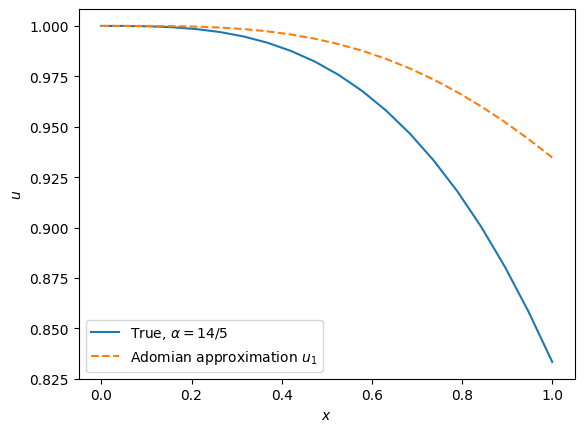

In [ ]:
#with torch.no_grad():
 #   yy = Uad(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=14/5$')
ax.plot(xx, U_1,'--', label=r'Adomian approximation $u_1$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
# Computation of u1=v0+v1 such that the solution u=v0+v1+v2+v3+.....
u2 =  lambda t: v_0(t) + v_1(t) + v_2(t)
xx = np.linspace(0, 1, 20)#[:, None]
U_2=[u2(xx[i]) for i in range(20)]

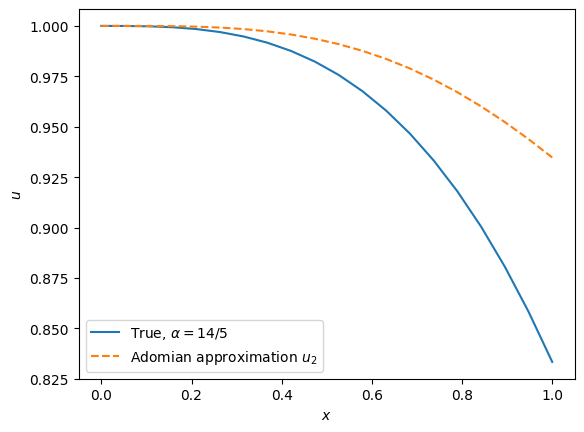

In [ ]:
#with torch.no_grad():
 #   yy = Uad(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=14/5$')
ax.plot(xx, U_2,'--', label=r'Adomian approximation $u_2$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
# Computation of u1=v0+v1 such that the solution u=v0+v1+v2+v3+.....
u3 =  lambda t: v_0(t) + v_1(t) + v_2(t)
xx = np.linspace(0, 1, 20)#[:, None]
U_3=[u3(xx[i]) for i in range(20)]

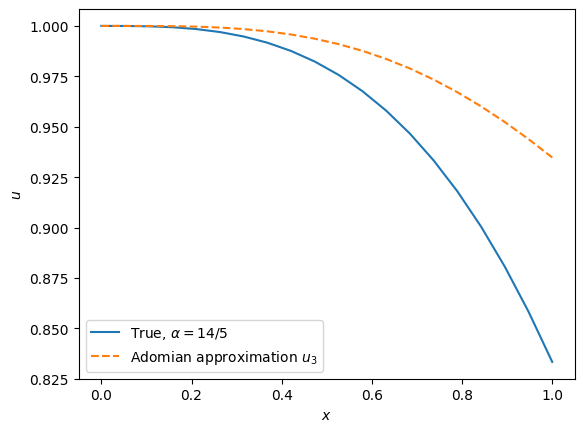

In [ ]:
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=14/5$')
ax.plot(xx, U_3,'--', label=r'Adomian approximation $u_3$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
def F0(t,v0,v1,v2):
    dv0 = grad(v0)
    ddv0 = grad(dv0)
    A0 = lambda t: np.sin(ddv0(t))
    #I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t:-(lmbda0/(Gm(alpha)))*Ipq(t,v0,1,alpha)
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*Ipq(t,v1,1,alpha-1)
    I4 = lambda t: -(lmbda2/(Gm(alpha-2)))*Ipq(t,v2,1,alpha-2)
    #I5 = lambda t: -(lmbda3/(Gm(alpha-3)))*Ipq(t,v3,1,alpha-3)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    g = lambda t: np.exp(t)*quad(lambda s: s*v0(s),a,b)[0]
    I6 = lambda t:-(1/Gm(alpha))*Ipq(t,g,1,alpha)
    I7= lambda t: -(mu/(Gm(alpha)))*Ipq(t,A0,1,alpha)
    #v3 = lambda t: I2(t) + I3(t) + I4(t)+ I5(t) + I6(t)
    v4 = lambda t: I2(t)+I3(t) +I4(t)+ I6(t)+ I7(t)
    return v4(t)

In [ ]:
v_3 = lambda t:F0(t,v_0,v_1,v_2)
u3 = lambda t: u2(t) + v_3(t)
xx = np.linspace(0, 1, 20)#[:, None]
U_3=[u3(xx[i]) for i in range(20)]

/usr/local/lib/python3.10/dist-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in power
  return f_raw(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/autograd/numpy/numpy_vjps.py:59: RuntimeWarning: divide by zero encountered in power
  lambda ans, x, y : unbroadcast_f(x, lambda g: g * y * x ** anp.where(y, y - 1, 1.)),
/usr/local/lib/python3.10/dist-packages/autograd/numpy/numpy_vjps.py:59: RuntimeWarning: invalid value encountered in scalar multiply
  lambda ans, x, y : unbroadcast_f(x, lambda g: g * y * x ** anp.where(y, y - 1, 1.)),


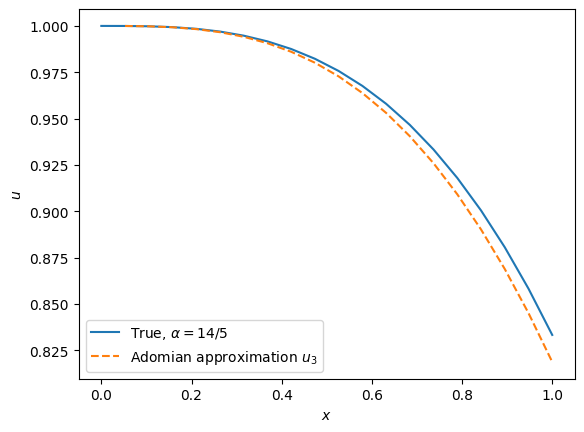

In [ ]:
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=14/5$')
ax.plot(xx, U_3,'--', label=r'Adomian approximation $u_3$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
def F1(t,v0,v1,v2):
    dv0=grad(v_0)
    ddv0=grad(dv0)
    dv1=grad(v_1)
    ddv1=grad(dv1)
    A1 = lambda t: np.cos(ddv0(t))*(ddv1(t))
    #I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t:-(lmbda0/(Gm(alpha)))*Ipq(t,v0,1,alpha)
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*Ipq(t,v1,1,alpha-1)
    I4 = lambda t: -(lmbda2/(Gm(alpha-2)))*Ipq(t,v2,1,alpha-2)
    #I5 = lambda t: -(lmbda3/(Gm(alpha-3)))*Ipq(t,v3,1,alpha-3)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    g = lambda t: np.exp(t)*quad(lambda s: s*v0(s),a,b)[0]
    I6 = lambda t:-(1/Gm(alpha))*Ipq(t,g,1,alpha)
    I7= lambda t: -(mu/(Gm(alpha)))*Ipq(t,A1,1,alpha)
    #v3 = lambda t: I2(t) + I3(t) + I4(t)+ I5(t) + I6(t)
    v4 = lambda t: I2(t)+I3(t) +I4(t) + I6(t)+ I7(t)
    return v4(t)

In [ ]:
v_4 = lambda t:F1(t,v_1,v_2,v_3)
u4 = lambda t: u3(t) + v_4(t)
xx = np.linspace(0, 1, 20)#[:, None]
U_4=[u4(xx[i]) for i in range(20)]

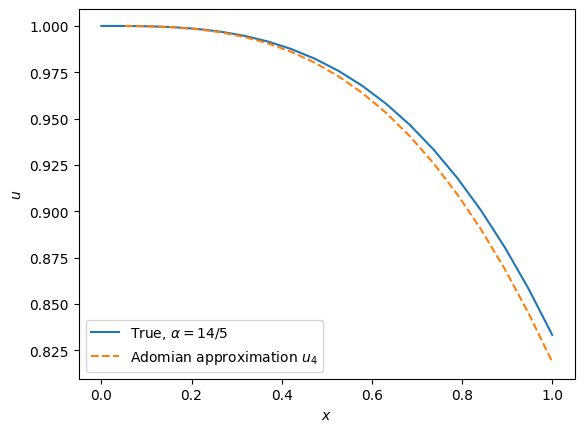

In [ ]:
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=14/5$')
ax.plot(xx, U_4,'--', label=r'Adomian approximation $u_4$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

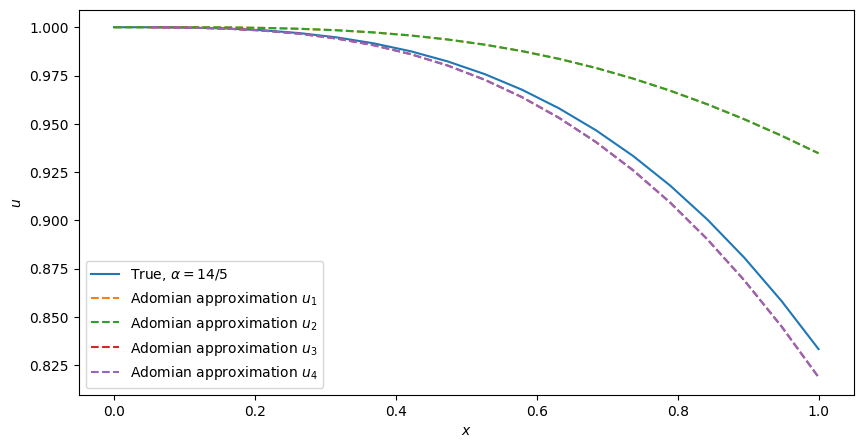

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=14/5$')
ax.plot(xx, U_1,'--', label=r'Adomian approximation $u_1$')
ax.plot(xx, U_2,'--', label=r'Adomian approximation $u_2$')
ax.plot(xx, U_3,'--', label=r'Adomian approximation $u_3$')
ax.plot(xx, U_4,'--', label=r'Adomian approximation $u_4$')
#ax.plot(xx, U_5,'--', label=r'Adomian approximation $u_5$')
#ax.plot(xx, U_6,'--', label=r'Adomian approximation $u_6$')
#ax.plot(xx, U_7,'--', label=r'Adomian approximation $u_7$')
#ax.plot(xx, U_8,'--', label=r'Adomian approximation $u_8$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

## Approximaton via ANN method

In [ ]:
# definition of the operator T
def T(t,u,v):
    I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t: -(lmbda0/(Gm(alpha)))*quad(lambda s,t:(t-s)**(alpha-1)*u(s),0,t,args=(t))[0]
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    I4 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-2)*quad(lambda s,t:(1-s)**(alpha-3)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]
    I41 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-1)*quad(lambda s,t:(1-s)**(alpha-3)*(-d1*(s+1)),-1,1,args=(t))[0]
    #I5 = lambda t: -lmbda3/Gm(alpha-3)*(t/2)**(alpha-3)*quad(lambda s,t:(1-s)**(alpha-4)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]
    #I51 = lambda t: -lmbda3/Gm(alpha-3)*(t/2)**(alpha-2)*quad(lambda s,t:(1-s)**(alpha-4)*(-d1*(s+1)),-1,1,args=(t))[0]
    #I52 = lambda t: -lmbda3/Gm(alpha-3)*(t/2)**(alpha-1)*quad(lambda s,t:(1-s)**(alpha-4)*(-d2/2*(s+1)**2),-1,1,args=(t))[0]
    g = lambda t: np.exp(t)*quad(lambda s: s*u(s),a,b)[0]
    I6 = lambda t:-(1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*g(s),0,t,args=(t))[0]
    I7 = lambda t:-(mu/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*f(v(s)),0,t,args=(t))[0]
    return d0 + d1*t + d2/2*t**2+ I1(t) + I2(t) + I3(t) + I4(t) + I41(t)  +  I6(t)+I7(t)

In [ ]:
T(1.,ue,ddue)-ue(1.)

Epoch: 0 | Loss: 0.7621239423751831
Epoch: 50 | Loss: 0.007658538408577442
Epoch: 100 | Loss: 0.007206962909549475
Epoch: 150 | Loss: 0.0047904858365654945
Epoch: 200 | Loss: 0.0028991219587624073
Epoch: 250 | Loss: 0.001807510619983077
Epoch: 300 | Loss: 0.0013176187640056014
Epoch: 350 | Loss: 0.0011273613199591637
Epoch: 400 | Loss: 0.001037283567711711
Epoch: 450 | Loss: 0.0009746660361997783


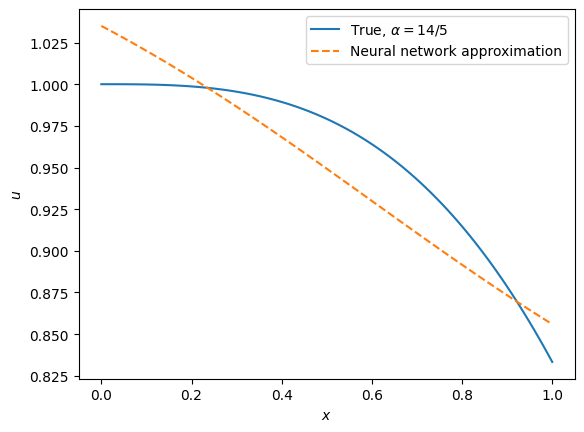

In [ ]:
N = nn.Sequential(
    nn.Linear(1,4),
    nn.Sigmoid(),
    nn.Linear(4,4),
    nn.Sigmoid(),
    nn.Linear(4,1)
    )
def loss(x):
    x.requires_grad = False
    outputs = N(x)
    pwl_spline = interpolate.splrep(X, N(X).detach().numpy())
    u_inter = lambda t:interpolate.splev(t, pwl_spline)
    du_inter = lambda t:interpolate.splev(t, pwl_spline,der=1)
    ddu_inter = lambda t:interpolate.splev(t, pwl_spline,der=2)
    Y = torch.tensor([T(X[i],u_inter,ddu_inter) for i in range(X.shape[0])],requires_grad=True).reshape(X.shape[0],1)
    return  torch.mean((outputs - Y)**2)

optimizer = torch.optim.Adam(N.parameters(),lr=0.01)

epochs = 500
for epoch in range(epochs):
    l = loss(X)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if epoch % (epochs*0.1)==0:
       print(f'Epoch: {epoch} | Loss: {l.item()}')

xx = np.linspace(0, 1, 100)[:, None]
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = ue(xx)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=14/5$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');

In [ ]:
optimizer = torch.optim.Adam(N.parameters(),lr=0.01)

epochs = 1000
for epoch in range(epochs):
    l = loss(X)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if epoch % (epochs*0.1)==0:
       print(f'Epoch: {epoch} | Loss: {l.item()}')

Epoch: 0 | Loss: 0.0009219779749400914


<ipython-input-23-31fa3d94ee89>:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I4 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-2)*quad(lambda s,t:(1-s)**(alpha-3)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]


Epoch: 100 | Loss: 0.0006334615172818303
Epoch: 200 | Loss: 0.0003930875682272017
Epoch: 300 | Loss: 0.00020942189439665526


<ipython-input-23-31fa3d94ee89>:13: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I7 = lambda t:-(mu/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*f(v(s)),0,t,args=(t))[0]


Epoch: 400 | Loss: 9.410062193637714e-05


<ipython-input-23-31fa3d94ee89>:13: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I7 = lambda t:-(mu/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*f(v(s)),0,t,args=(t))[0]


Epoch: 500 | Loss: 3.690533776534721e-05
Epoch: 600 | Loss: 1.383370727126021e-05
Epoch: 700 | Loss: 6.058245162421372e-06
Epoch: 800 | Loss: 3.73532748199068e-06
Epoch: 900 | Loss: 2.9902480491728056e-06


In [ ]:
epochs = 500
for epoch in range(epochs):
    l = loss(X)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if epoch % (epochs*0.1)==0:
       print(f'Epoch: {epoch} | Loss: {l.item()}')

Epoch: 0 | Loss: 2.6284365048923064e-06
Epoch: 50 | Loss: 2.489152848283993e-06
Epoch: 100 | Loss: 2.3662985313421814e-06
Epoch: 150 | Loss: 2.2546294076164486e-06
Epoch: 200 | Loss: 2.156126356567256e-06
Epoch: 250 | Loss: 2.0697711988759693e-06
Epoch: 300 | Loss: 1.993324303839472e-06


<ipython-input-23-31fa3d94ee89>:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I4 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-2)*quad(lambda s,t:(1-s)**(alpha-3)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]


Epoch: 350 | Loss: 1.927063294715481e-06
Epoch: 400 | Loss: 1.871034555733786e-06
Epoch: 450 | Loss: 1.8236239611724159e-06


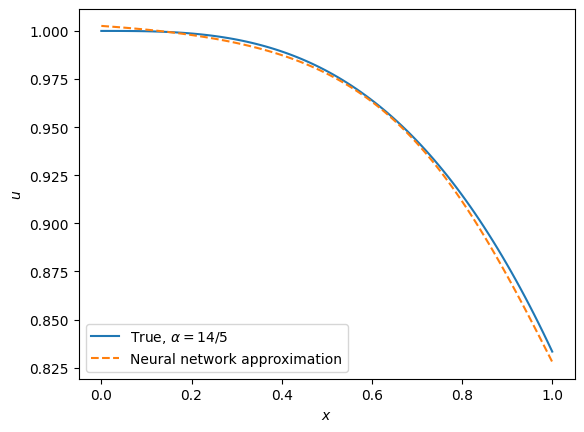

In [ ]:
xx = np.linspace(0, 1, 100)[:, None]
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = ue(xx)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=14/5$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');

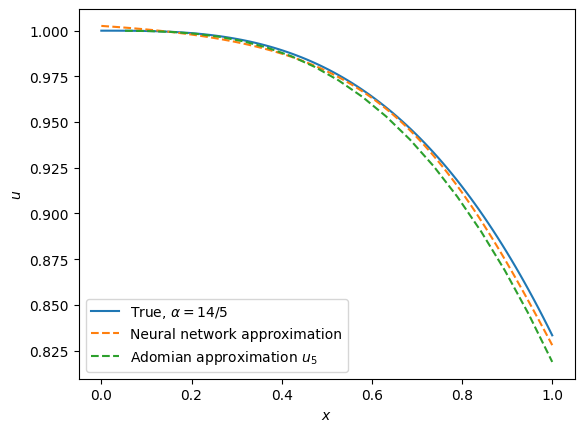

In [ ]:
xx = np.linspace(0, 1, 100)[:, None]
xxx = np.linspace(0, 1, 20)#[:, None]
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = ue(xx)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=14/5$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.plot(xxx, U_4,'--', label=r'Adomian approximation $u_5$')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');

# Example 5.(Example 10 in the article)

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy.special import gamma
from scipy.integrate import quad
from scipy import interpolate
import scipy as sc
from scipy.special import gamma
from scipy.interpolate import interp1d
from math import pi, sqrt
import tensorflow as tf

## check if GPU is available and use it; otherwise use CPU
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
#X = torch.Tensor(np.linspace(0, 2, 100)[:, None])
X = torch.Tensor(np.linspace(0, 1, 10)).reshape(10,1)

In [ ]:
# definition of problem functions
Gm = lambda x: gamma(x)
phi = lambda x: (2*np.log(2)-3/4)*x
f = lambda u: np.exp(-4*u)
K = lambda x,t: x*(1+t)
ue = lambda x: np.log(1+x)
#due = lambda x: -np.sin(x)-np.cos(x)
# constants and parameters
alpha=4
d0 = 0.;d1=1.;d2=-1;d3=2.;lmbda0=0;lmbda1=0;lmbda2=0;lmbda3=0;mu=6;a=0;b=1.


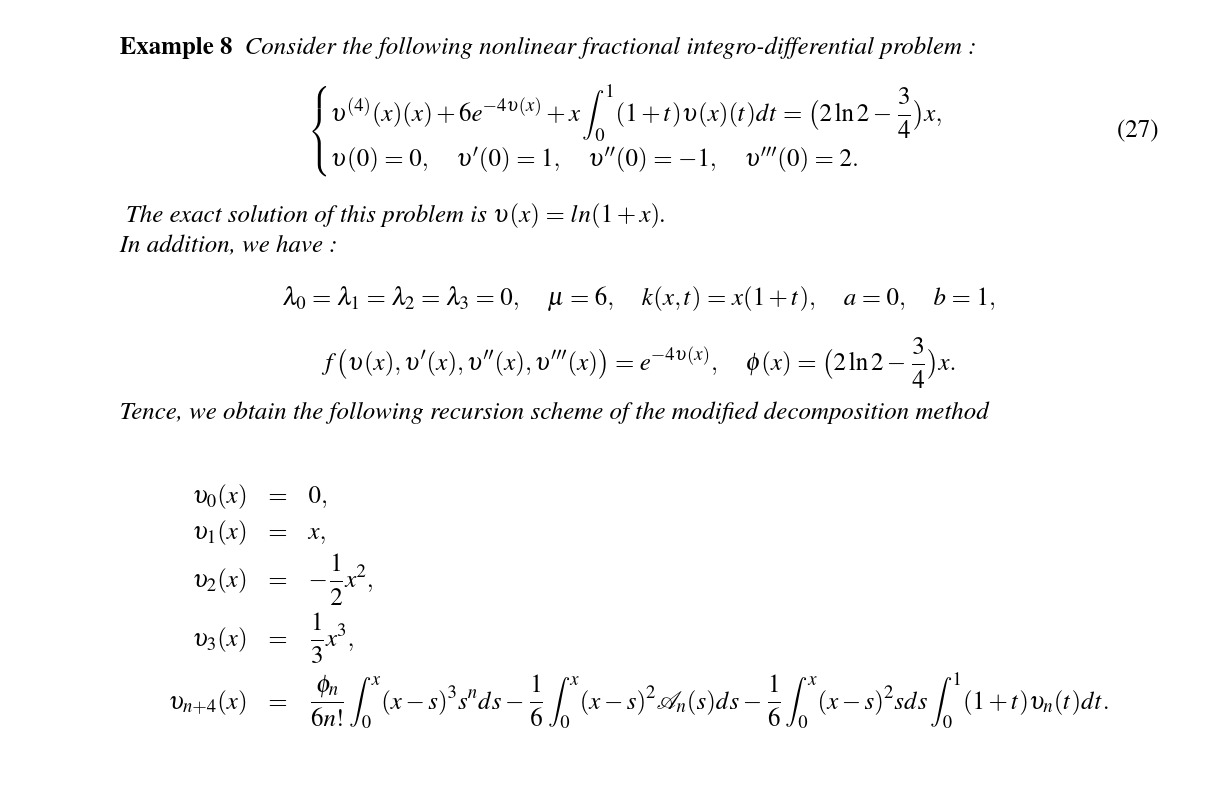

### Approximation via Adomian method

In [ ]:
import autograd.numpy as np
from autograd import grad

In [ ]:
from tensorflow.python.ops.variable_scope import variable_creator_scope_v1
# Approximation of the integrals via Gauss-Jacobi quadrature
quad_deg =50;p=1;q=alpha
quad_x, _ = sc.special.roots_jacobi(quad_deg,q-1,p-1)
quad_w= lambda p,q:sc.special.roots_jacobi(quad_deg,q-1,p-1)[1]
Ipq=lambda t,v,p,q: (t/2)**(p+q-1)*sum(np.array([v(t/2*(quad_x[i]+1)) for i in range(quad_deg)])*quad_w(p,q))
# Initial function terms
v_2 = lambda t: d0 + 0*t
v_3 = lambda t: 0*t
v_1 = lambda t: (d2/2)*t**2+ d3/6*t**3+d1*t
v_0 = lambda t: (1/Gm(alpha))*Ipq(t,phi,p,q)
#A0= lambda v0:v0**2
#A1= lambda v0,v1:2*v0*v1


\begin{align}
\int_0^ts^{p-1}(t-s)^{q-1}f(s)ds &= \left(  \frac{t}{2} \right) ^{p+q-1} \int_{-1}^1 (1 + s)^{p-1} (1 - s )^{q-1} f\left( \frac{t}{2}(s+1)\right) ds\notag\\
&\approx \left(  \frac{t}{2} \right) ^{p+q-1}\sum_{i=1}^{n}\omega(x_i) f\left( \frac{t}{2}(x_i+1)\right).
\end{align}

In [ ]:
# Computation of u1=v0+v1 such that the solution u=v0+v1+v2+v3+.....
u1 =  lambda t: v_0(t) + v_1(t)
xx = np.linspace(0, 1, 50)#[:, None]
U_1=[u1(xx[i]) for i in range(50)]

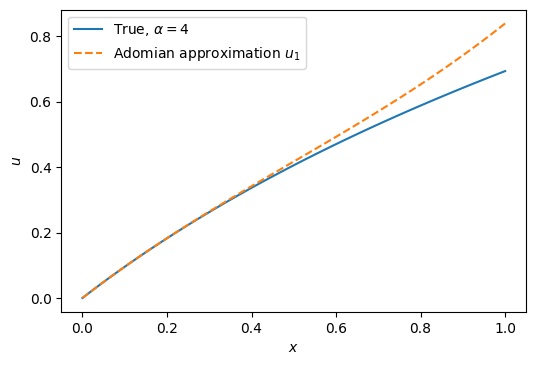

In [ ]:
#with torch.no_grad():
 #   yy = Uad(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=4$')
ax.plot(xx, U_1,'--', label=r'Adomian approximation $u_1$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
# Computation of u1=v0+v1 such that the solution u=v0+v1+v2+v3+.....
u2 =  lambda t: v_0(t) + v_1(t) + v_2(t)
xx = np.linspace(0, 1, 50)#[:, None]
U_2=[u2(xx[i]) for i in range(50)]

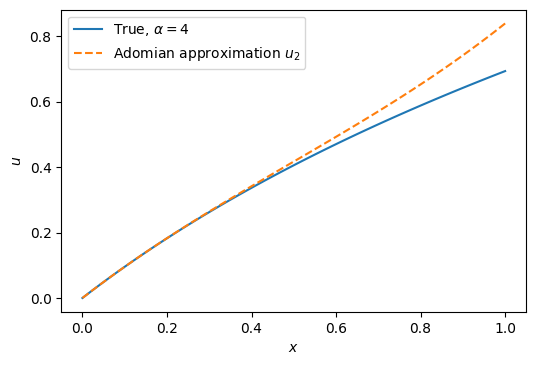

In [ ]:
#with torch.no_grad():
 #   yy = Uad(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=4$')
ax.plot(xx, U_2,'--', label=r'Adomian approximation $u_2$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
# Computation of u1=v0+v1 such that the solution u=v0+v1+v2+v3+.....
u3 =  lambda t: v_0(t) + v_1(t) + v_2(t)+ v_3(t)
xx = np.linspace(0, 1, 50)#[:, None]
U_3=[u3(xx[i]) for i in range(50)]

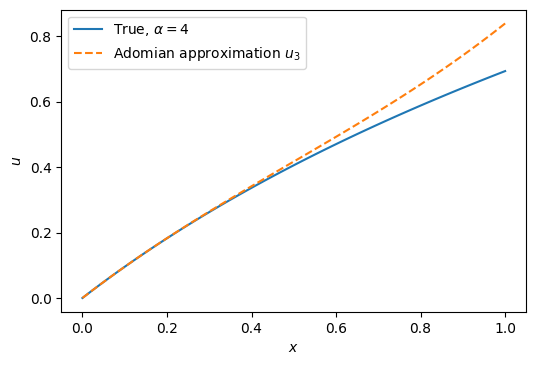

In [ ]:
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=4$')
ax.plot(xx, U_3,'--', label=r'Adomian approximation $u_3$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
def F0(t,v0):
    #dv0 = grad(v0)
    A0 = lambda t: np.exp(-4*v0(t))
    #I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    #I2 = lambda t:-(lmbda0/(Gm(alpha)))*Ipq(t,v0,1,alpha)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*Ipq(t,v1,1,alpha-1)
    #I4 = lambda t: -(lmbda2/(Gm(alpha-2)))*Ipq(t,v2,1,alpha-2)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    g = lambda t: t*quad(lambda s: (1+s)*v0(s),a,b)[0]
    I5 = lambda t:-(1/Gm(alpha))*Ipq(t,g,1,alpha)
    I6= lambda t: -(mu/(Gm(alpha)))*Ipq(t,A0,1,alpha)
    v4 = lambda t:  I5(t) + I6(t)
    return v4(t)

In [ ]:
v_4 = lambda t:F0(t,v_0)
u4 = lambda t: u3(t) + v_4(t)
xx = np.linspace(0, 1, 50)#[:, None]
U_4=[u4(xx[i]) for i in range(50)]

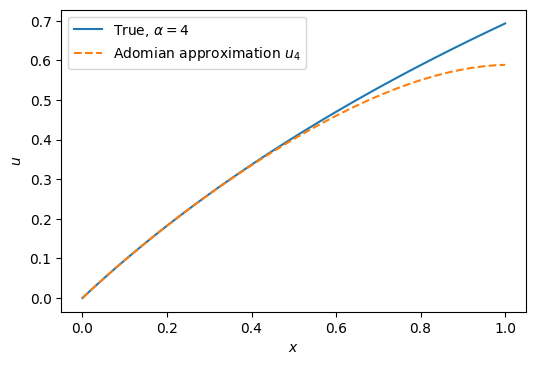

In [ ]:
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=4$')
ax.plot(xx, U_4,'--', label=r'Adomian approximation $u_4$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
def F1(t,v1):
    A1 = lambda t: -4*v_1(t)*np.exp(-4*v_0(t))
    #I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    #I2 = lambda t:-(lmbda0/(Gm(alpha)))*Ipq(t,v1,1,alpha)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*Ipq(t,v2,1,alpha-1)
    #I4 = lambda t: -(lmbda2/(Gm(alpha-2)))*Ipq(t,v3,1,alpha-2)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    g = lambda t: t*quad(lambda s: (s+1)*v1(s),a,b)[0]
    I5 = lambda t:-(1/Gm(alpha))*Ipq(t,g,1,alpha)
    I6= lambda t: -(mu/(Gm(alpha)))*Ipq(t,A1,1,alpha)
    v4 = lambda t:  I5(t) + I6(t)
    return v4(t)

In [ ]:
v_5 = lambda t:F1(t,v_1)
u5 = lambda t: u4(t) + v_5(t)
xx = np.linspace(0, 1, 50)#[:, None]
U_5=[u5(xx[i]) for i in range(50)]

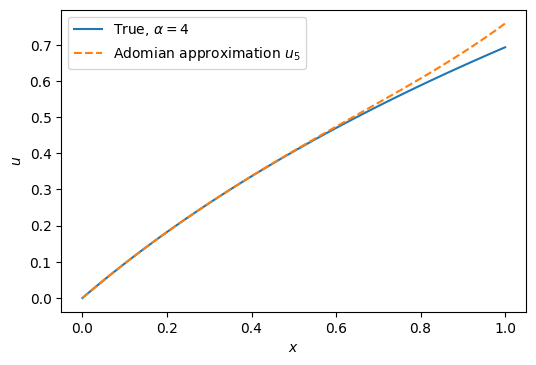

In [ ]:
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=4$')
ax.plot(xx, U_5,'--', label=r'Adomian approximation $u_5$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
def F2(t,v1):
    A2 = lambda t: -4*(v_2(t)-2*v_1(t)**2)*np.exp(-4*v_0(t))
    #I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    #I2 = lambda t:-(lmbda0/(Gm(alpha)))*Ipq(t,v1,1,alpha)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*Ipq(t,v2,1,alpha-1)
    #I4 = lambda t: -(lmbda2/(Gm(alpha-2)))*Ipq(t,v3,1,alpha-2)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    g = lambda t: t*quad(lambda s: (s+1)*v1(s),a,b)[0]
    I5 = lambda t:-(1/Gm(alpha))*Ipq(t,g,1,alpha)
    I6= lambda t: -(mu/(Gm(alpha)))*Ipq(t,A2,1,alpha)
    v4 = lambda t:  I5(t) + I6(t)
    return v4(t)

In [ ]:
v_6 = lambda t:F2(t,v_2)
u6 = lambda t: u5(t) + v_6(t)
xx = np.linspace(0, 1, 50)#[:, None]
U_6=[u6(xx[i]) for i in range(50)]

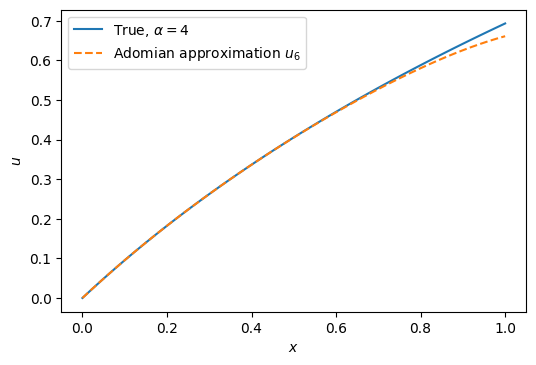

In [ ]:
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=4$')
ax.plot(xx, U_6,'--', label=r'Adomian approximation $u_6$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
def F3(t,v1):
    A3 = lambda t: -4*(v_3(t)-4*v_1(t)*v_2(t)+8/3*v_1(t)**3)*np.exp(-4*v_0(t))
    #I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    #I2 = lambda t:-(lmbda0/(Gm(alpha)))*Ipq(t,v1,1,alpha)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*Ipq(t,v2,1,alpha-1)
    #I4 = lambda t: -(lmbda2/(Gm(alpha-2)))*Ipq(t,v3,1,alpha-2)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    g = lambda t: t*quad(lambda s: (s+1)*v1(s),a,b)[0]
    I5 = lambda t:-(1/Gm(alpha))*Ipq(t,g,1,alpha)
    I6= lambda t: -(mu/(Gm(alpha)))*Ipq(t,A3,1,alpha)
    v4 = lambda t:  I5(t) + I6(t)
    return v4(t)

v_7 = lambda t:F3(t,v_3)
u7 = lambda t: u6(t) + v_7(t)
xx = np.linspace(0, 1, 50)#[:, None]
U_7=[u7(xx[i]) for i in range(50)]

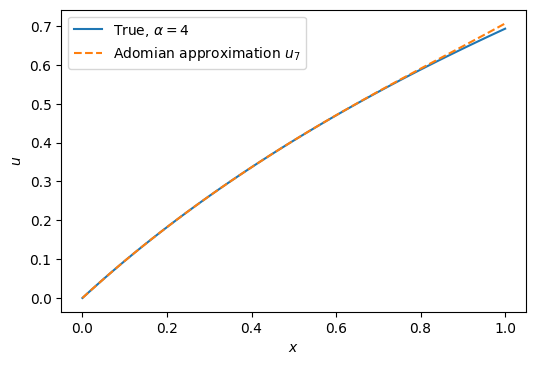

In [ ]:
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=4$')
ax.plot(xx, U_7,'--', label=r'Adomian approximation $u_7$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
def F4(t,v1):
    A4 = lambda t: (-4*v_4(t)+8*v_2(t)**2+16*v_1(t)*v_3(t)-32*v_1(t)**2*v_2(t)+1/24*v_1(t)**4)*np.exp(-4*v_0(t))
    #I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    #I2 = lambda t:-(lmbda0/(Gm(alpha)))*Ipq(t,v1,1,alpha)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*Ipq(t,v2,1,alpha-1)
    #I4 = lambda t: -(lmbda2/(Gm(alpha-2)))*Ipq(t,v3,1,alpha-2)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    g = lambda t: t*quad(lambda s: (s+1)*v1(s),a,b)[0]
    I5 = lambda t:-(1/Gm(alpha))*Ipq(t,g,1,alpha)
    I6= lambda t: -(mu/(Gm(alpha)))*Ipq(t,A4,1,alpha)
    v4 = lambda t:  I5(t) + I6(t)
    return v4(t)

v_8 = lambda t:F4(t,v_4)
u8 = lambda t: u7(t) + v_8(t)
xx = np.linspace(0, 1, 50)#[:, None]
U_8=[u8(xx[i]) for i in range(50)]

In [ ]:
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=4$')
ax.plot(xx, U_8,'--', label=r'Adomian approximation $u_8$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

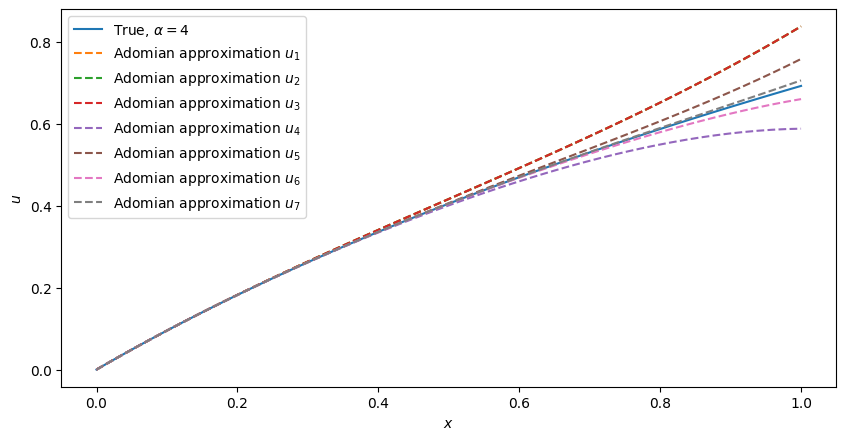

In [ ]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=4$')
ax.plot(xx, U_1,'--', label=r'Adomian approximation $u_1$')
ax.plot(xx, U_2,'--', label=r'Adomian approximation $u_2$')
ax.plot(xx, U_3,'--', label=r'Adomian approximation $u_3$')
ax.plot(xx, U_4,'--', label=r'Adomian approximation $u_4$')
ax.plot(xx, U_5,'--', label=r'Adomian approximation $u_5$')
ax.plot(xx, U_6,'--', label=r'Adomian approximation $u_6$')
ax.plot(xx, U_7,'--', label=r'Adomian approximation $u_7$')
#ax.plot(xx, U_8,'--', label=r'Adomian approximation $u_8$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=3$')
ax.plot(xx, U_1,'--', label=r'Adomian approximation $u_1$')
ax.plot(xx, U_2,'--', label=r'Adomian approximation $u_2$')
ax.plot(xx, U_3,'--', label=r'Adomian approximation $u_3$')
ax.plot(xx, U_4,'--', label=r'Adomian approximation $u_4$')
ax.plot(xx, U_5,'--', label=r'Adomian approximation $u_5$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

### Approximaton via ANN method

In [ ]:
# definition of the operator T = I1 + I2 + I3 + I4
def T(t,u):
    I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t: -(lmbda0/(Gm(alpha)))*quad(lambda s,t:(t-s)**(alpha-1)*u(s),0,t,args=(t))[0]
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    I4 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-2)*quad(lambda s,t:(1-s)**(alpha-3)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]
    I41 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-1)*quad(lambda s,t:(1-s)**(alpha-3)*(-d1*(s+1)),-1,1,args=(t))[0]
    I5 = lambda t: -lmbda3/Gm(alpha-3)*(t/2)**(alpha-3)*quad(lambda s,t:(1-s)**(alpha-4)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]
    I51 = lambda t: -lmbda3/Gm(alpha-3)*(t/2)**(alpha-2)*quad(lambda s,t:(1-s)**(alpha-4)*(-d1*(s+1)),-1,1,args=(t))[0]
    I52 = lambda t: -lmbda3/Gm(alpha-3)*(t/2)**(alpha-1)*quad(lambda s,t:(1-s)**(alpha-4)*(-d2/2*(s+1)**2),-1,1,args=(t))[0]
    g = lambda t: t*quad(lambda s: (s+1)*u(s),a,b)[0]
    I6 = lambda t:-(1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*g(s),0,t,args=(t))[0]
    I7 = lambda t:-(mu/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*f(u(s)),0,t,args=(t))[0]
    return d0 + d1*t + d2/2*t**2+ d3/6*t**3+I1(t) + I2(t) + I3(t) + I4(t) + I41(t)  + I5(t) +I51(t)+I52(t) + I6(t)+I7(t)

Epoch: 0 | Loss: 0.0632038563489914
Epoch: 50 | Loss: 0.04851178079843521
Epoch: 100 | Loss: 0.00154516298789531
Epoch: 150 | Loss: 0.00017406971892341971
Epoch: 200 | Loss: 8.371395233552903e-05
Epoch: 250 | Loss: 5.319777847034857e-05
Epoch: 300 | Loss: 4.2286883399356157e-05
Epoch: 350 | Loss: 3.8283666071947664e-05
Epoch: 400 | Loss: 3.6582714528776705e-05
Epoch: 450 | Loss: 3.558203388820402e-05


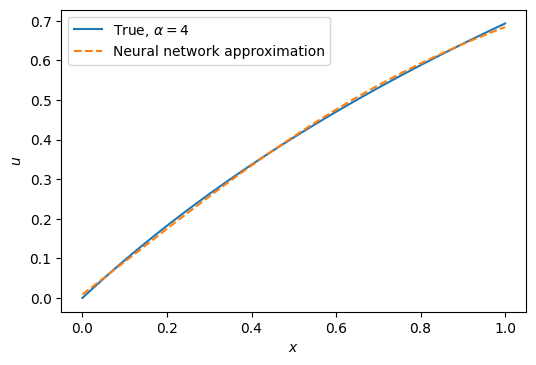

In [ ]:
N = nn.Sequential(
    nn.Linear(1,4),
    nn.Sigmoid(),
    nn.Linear(4,4),
    nn.Sigmoid(),
    nn.Linear(4,1)
    )
def loss(x):
    x.requires_grad = False
    outputs = N(x)
    pwl_spline = interpolate.splrep(X, N(X).detach().numpy())
    u_inter = lambda t:interpolate.splev(t, pwl_spline)
    du_inter = lambda t:interpolate.splev(t, pwl_spline,der=1)
    ddu_inter = lambda t:interpolate.splev(t, pwl_spline,der=2)
    Y = torch.tensor([T(X[i],u_inter) for i in range(X.shape[0])],requires_grad=True).reshape(X.shape[0],1)
    return  torch.mean((outputs - Y)**2)

optimizer = torch.optim.Adam(N.parameters(),lr=0.01)

epochs = 500
for epoch in range(epochs):
    l = loss(X)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if epoch % (epochs*0.1)==0:
       print(f'Epoch: {epoch} | Loss: {l.item()}')

xx = np.linspace(0, 1, 100)[:, None]
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = np.log(1+xx)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=4$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');

In [ ]:
optimizer = torch.optim.Adam(N.parameters(),lr=0.01)

epochs = 1000
for epoch in range(epochs):
    l = loss(X)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if epoch % (epochs*0.1)==0:
       print(f'Epoch: {epoch} | Loss: {l.item()}')

Epoch: 0 | Loss: 0.00017617212142795324
Epoch: 100 | Loss: 0.00015340880781877786
Epoch: 200 | Loss: 0.00013101664080750197
Epoch: 300 | Loss: 0.00010907535761361942
Epoch: 400 | Loss: 9.007445623865351e-05
Epoch: 500 | Loss: 7.449166878359392e-05
Epoch: 600 | Loss: 6.198951450642198e-05
Epoch: 700 | Loss: 5.198931830818765e-05
Epoch: 800 | Loss: 4.389977402752265e-05
Epoch: 900 | Loss: 3.71855785488151e-05


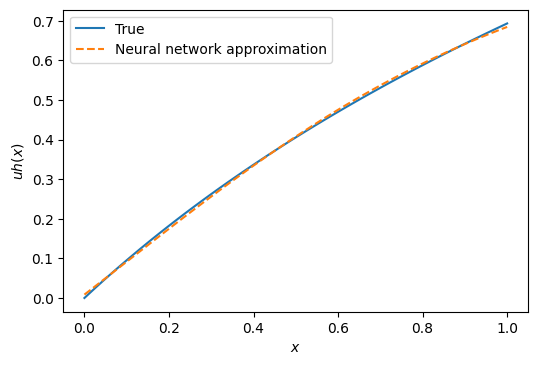

In [ ]:
xx = np.linspace(0, 1, 100)[:, None]
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = np.log(1+xx)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=4$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');

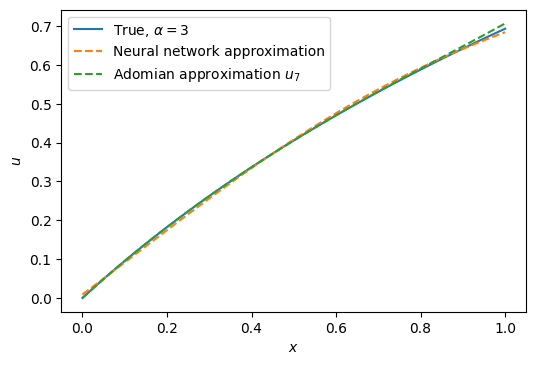

In [ ]:
xx = np.linspace(0, 1, 100)[:, None]
xxx = np.linspace(0, 1, 50)#[:, None]
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = np.log(1+xx)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=3$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.plot(xxx, U_7,'--', label=r'Adomian approximation $u_7$')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');

# Example 6.(Example 11  in the article)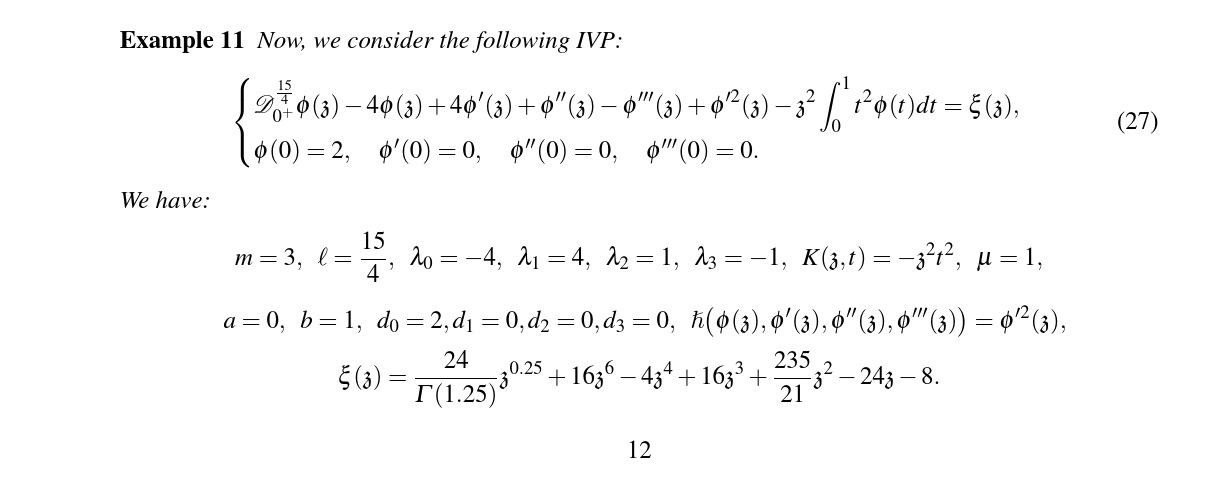

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy.special import gamma
from scipy.integrate import quad
from scipy import interpolate
import scipy as sc
from scipy.special import gamma
from scipy.interpolate import interp1d
from math import pi, sqrt
import tensorflow as tf

## check if GPU is available and use it; otherwise use CPU
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
#X = torch.Tensor(np.linspace(0, 2, 100)[:, None])
X = torch.Tensor(np.linspace(0, 1, 10)).reshape(10,1)

In [ ]:
# definition of problem functions
Gm = lambda x: gamma(x)
phi = lambda x: 24/Gm(1.25)*x**0.25+16*x**6-4*x**4+16*x**3+235/21*x**2-24*x-8
f = lambda v: v**2
K = lambda x,t:-x**2*t**2
ue = lambda x: 2+x**4
due = lambda x: 4*x**3
# constants and parameters
alpha=15/4
d0 =2;d1=0;d2=0;d3=0;lmbda0=-4.;lmbda1=4.;lmbda2=1.;lmbda3=-1;mu=1.;a=0.;b=1


### Approximation via Adomian method

In [ ]:
import autograd.numpy as np
from autograd import grad

In [ ]:
from tensorflow.python.ops.variable_scope import variable_creator_scope_v1
# Approximation of the integrals via Gauss-Jacobi quadrature
quad_deg =50;p=1;q=alpha
quad_x, _ = sc.special.roots_jacobi(quad_deg,q-1,p-1)
quad_w= lambda p,q:sc.special.roots_jacobi(quad_deg,q-1,p-1)[1]
Ipq=lambda t,v,p,q: (t/2)**(p+q-1)*sum(np.array([v(t/2*(quad_x[i]+1)) for i in range(quad_deg)])*quad_w(p,q))
# Initial function terms
v_0 = lambda t: d0 + 0*t
v_1 = lambda t: (d2/2)*t**2+ d1*t
v_3 = lambda t: (1/Gm(alpha))*Ipq(t,phi,p,q)
v_2 = lambda t: d3*t
#A0= lambda v0:v0**2
#A1= lambda v0,v1:2*v0*v1


\begin{align}
\int_0^ts^{p-1}(t-s)^{q-1}f(s)ds &= \left(  \frac{t}{2} \right) ^{p+q-1} \int_{-1}^1 (1 + s)^{p-1} (1 - s )^{q-1} f\left( \frac{t}{2}(s+1)\right) ds\notag\\
&\approx \left(  \frac{t}{2} \right) ^{p+q-1}\sum_{i=1}^{n}\omega(x_i) f\left( \frac{t}{2}(x_i+1)\right).
\end{align}

In [ ]:
# Computation of u1=v0+v1 such that the solution u=v0+v1+v2+v3+.....
u1 =  lambda t: v_0(t) + v_1(t) + v_2(t) + v_3(t)

In [ ]:
xx = np.linspace(0, 1, 50)#[:, None]
U_1=[u1(xx[i]) for i in range(50)]

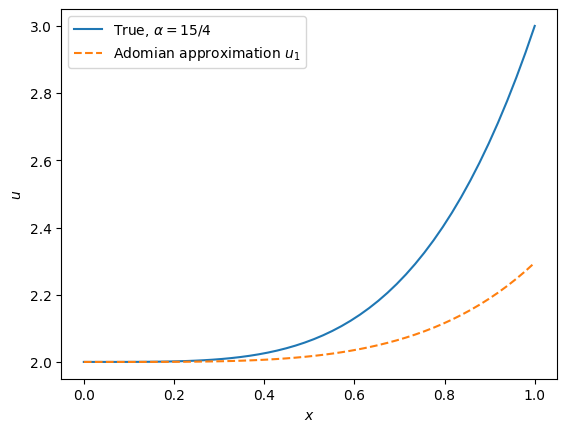

In [ ]:
#with torch.no_grad():
 #   yy = Uad(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=15/4$')
ax.plot(xx, U_1,'--', label=r'Adomian approximation $u_1$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
def F0(t,v0,v1,v2,v3):
    dv0 = grad(v_0)
    A0 = lambda t: (dv0(t))**2
    #I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t:-(lmbda0/(Gm(alpha)))*Ipq(t,v0,1,alpha)
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*Ipq(t,v1,1,alpha-1)
    I4 = lambda t: -(lmbda2/(Gm(alpha-2)))*Ipq(t,v2,1,alpha-2)
    I41 = lambda t: -(lmbda3/(Gm(alpha-3)))*Ipq(t,v3,1,alpha-3)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    g = lambda t: -t**2*quad(lambda s: s**2*v0(s),a,b)[0]
    I5 = lambda t:+(1/Gm(alpha))*Ipq(t,g,1,alpha)
    I6= lambda t: -(mu/(Gm(alpha)))*Ipq(t,A0,1,alpha)
    v4 = lambda t: I2(t) + I3(t) + I4(t)+I41(t)+ I5(t) + I6(t)
    return v4(t)

In [ ]:
v_4 = lambda t:F0(t,v_0,v_1,v_2,v_3)
u2 = lambda t: u1(t) + v_4(t)

In [ ]:
xx = np.linspace(0, 1, 50)#[:, None]
U_2=[u2(xx[i]) for i in range(50)]

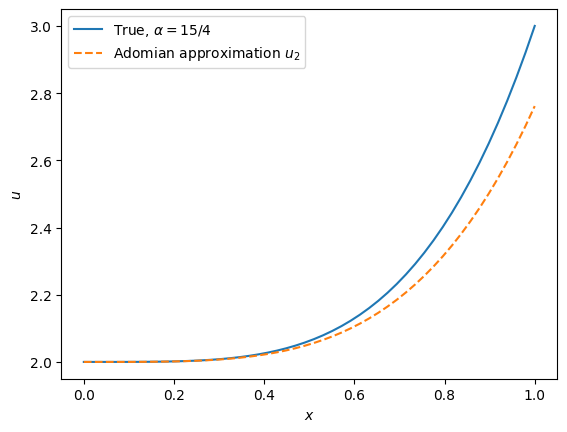

In [ ]:
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=15/4$')
ax.plot(xx, U_2,'--', label=r'Adomian approximation $u_2$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
def F1(t,v1,v2,v3,v4):
    dv0=grad(v_0)
    dv1=grad(v_1)
    A1 = lambda t: 2*(dv0(t))*(dv1(t))
    #I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t:-(lmbda0/(Gm(alpha)))*Ipq(t,v1,1,alpha)
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*Ipq(t,v2,1,alpha-1)
    I4 = lambda t: -(lmbda2/(Gm(alpha-2)))*Ipq(t,v3,1,alpha-2)
    I41 = lambda t: -(lmbda3/(Gm(alpha-3)))*Ipq(t,v4,1,alpha-3)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    g = lambda t: -t**2*quad(lambda s: s**2*v1(s),a,b)[0]
    I5 = lambda t:(1/Gm(alpha))*Ipq(t,g,1,alpha)
    I6= lambda t: -(mu/(Gm(alpha)))*Ipq(t,A1,1,alpha)
    v5 = lambda t: I2(t) + I3(t) + I4(t)+ I41(t) + I5(t) + I6(t)
    return v5(t)

In [ ]:
v_5 = lambda t:F1(t,v_1,v_2,v_3,v_4)
u3 = lambda t: u2(t) + v_5(t)

In [ ]:
xx = np.linspace(0, 1, 50)#[:, None]
U_3=[u3(xx[i]) for i in range(50)]

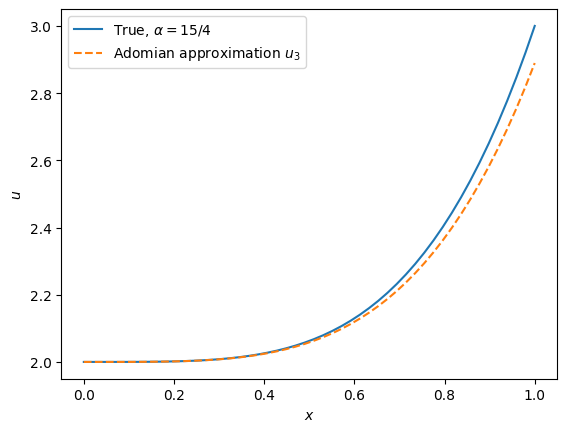

In [ ]:
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=15/4$')
ax.plot(xx, U_3,'--', label=r'Adomian approximation $u_3$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

In [ ]:
def F2(t,v2,v3,v4,v5):
    dv0=grad(v_0)
    dv1=grad(v_1)
    dv2=grad(v_2)
    A2 = lambda t:  2*dv0(t)*dv2(t)+dv1(t)**2
    #I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t:-(lmbda0/(Gm(alpha)))*Ipq(t,v2,1,alpha)
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*Ipq(t,v3,1,alpha-1)
    I4 = lambda t: -(lmbda2/(Gm(alpha-2)))*Ipq(t,v4,1,alpha-2)
    I4 = lambda t: -(lmbda3/(Gm(alpha-3)))*Ipq(t,v5,1,alpha-3)
    #I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    g = lambda t: -t**2*quad(lambda s: s**2*v2(s),a,b)[0]
    I5 = lambda t:(1/Gm(alpha))*Ipq(t,g,1,alpha)
    I6= lambda t: -(mu/(Gm(alpha)))*Ipq(t,A2,1,alpha)
    v6 = lambda t: I2(t) + I3(t) + I4(t)+ I5(t) + I6(t)
    return v6(t)

In [ ]:
v_6 = lambda t:F2(t,v_2,v_3,v_4,v_5)
u4 = lambda t: u3(t) + v_6(t)

In [ ]:
xx = np.linspace(0, 1, 50)#[:, None]
U_4=[u4(xx[i]) for i in range(50)]

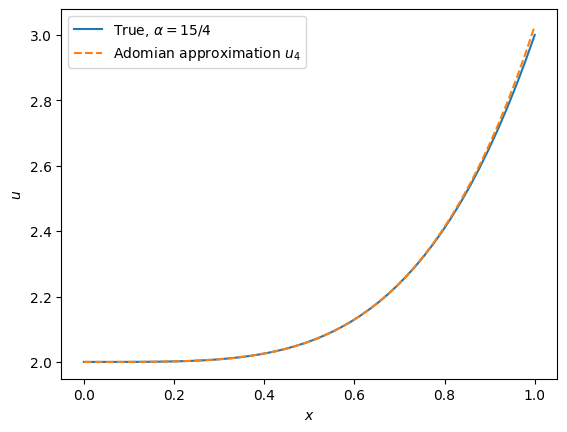

In [ ]:
#with torch.no_grad():
 #   yy = uh(torch.Tensor(xx)).numpy()
yt = lambda t:ue(t)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=15/4$')
ax.plot(xx, U_4,'--', label=r'Adomian approximation $u_4$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

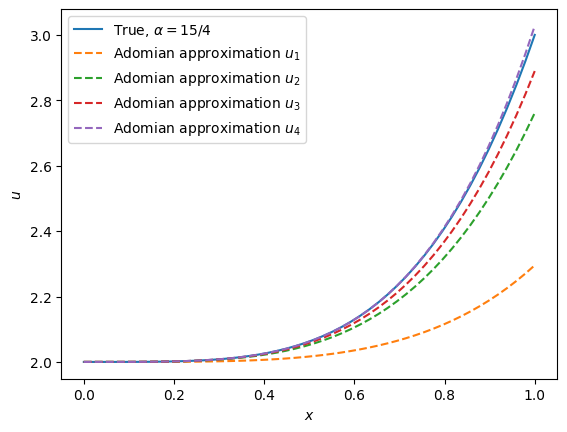

In [ ]:
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt(xx), label=r'True, $\alpha=15/4$')
ax.plot(xx, U_1,'--', label=r'Adomian approximation $u_1$')
ax.plot(xx, U_2,'--', label=r'Adomian approximation $u_2$')
ax.plot(xx, U_3,'--', label=r'Adomian approximation $u_3$')
ax.plot(xx, U_4,'--', label=r'Adomian approximation $u_4$')
#ax.plot(xx, U_5,'--', label=r'Adomian approximation $u_5$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u$')
plt.legend(loc='best');

### Approximation via ANN method

In [ ]:
# definition of the operator T = I1 + I2 + I3 + I4
def F(t,u,v):
    d_0=lambda t:d0
    d_1=lambda t:d1/2*(t+1)
    I1 = lambda t: (1/Gm(alpha))*Ipq(t,phi,1,alpha)
    I2 = lambda t: -(lmbda0/(Gm(alpha)))*Ipq(t,u,1,alpha)
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*(Ipq(t,u,1,alpha-1)-Ipq(t,d_0,1,alpha-1))
    I4 = lambda t: -lmbda2/Gm(alpha-2)*(Ipq(t,u,1,alpha-2)-Ipq(t,d_0,1,alpha-2)-Ipq(t,d_1,1,alpha-2))
    #I41 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-1)*quad(lambda s,t:(1-s)**(alpha-3)*(-d1*(s+1)),-1,1,args=(t))[0]
    g = lambda t: -t**2*quad(lambda s: s**2*u(s),a,b)[0]
    I5 = lambda t:-(1/Gm(alpha))*Ipq(t,g,1,alpha)
    I6 = lambda t:-(mu/Gm(alpha))*Ipq(t,f(u,v),1,alpha)
    return d0 + d1*t + d2/2*t**2+ I1(t) + I2(t) + I3(t) + I4(t)  + I5(t) + I6(t)

In [ ]:
# definition of problem functions
Gm = lambda x: gamma(x)
phi = lambda x: 24/Gm(1.25)*x**0.25+16*x**6-4*x**4+16*x**3+235/21*x**2-24*x-8
f = lambda v: v**2
K = lambda x,t:-x**2*t**2
ue = lambda x: 2+x**4
due = lambda x: 4*x**3
# constants and parameters
alpha=15/4
d0 =2;d1=0;d2=0;d3=0;lmbda0=-4.;lmbda1=4.;lmbda2=1.;lmbda3=-1;mu=1.;a=0.;b=1

In [ ]:
# definition of the operator T
def T(t,u,v):
    I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t: -(lmbda0/(Gm(alpha)))*quad(lambda s,t:(t-s)**(alpha-1)*u(s),0,t,args=(t))[0]
    I3 = lambda t: -(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    I4 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-2)*quad(lambda s,t:(1-s)**(alpha-3)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]
    I41 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-1)*quad(lambda s,t:(1-s)**(alpha-3)*(-d1*(s+1)),-1,1,args=(t))[0]
    I5 = lambda t: -lmbda3/Gm(alpha-3)*(t/2)**(alpha-3)*quad(lambda s,t:(1-s)**(alpha-4)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]
    I51 = lambda t: -lmbda3/Gm(alpha-3)*(t/2)**(alpha-2)*quad(lambda s,t:(1-s)**(alpha-4)*(-d1*(s+1)),-1,1,args=(t))[0]
    I52 = lambda t: -lmbda3/Gm(alpha-3)*(t/2)**(alpha-1)*quad(lambda s,t:(1-s)**(alpha-4)*(-d2/2*(s+1)**2),-1,1,args=(t))[0]
    g = lambda t: -t**2*quad(lambda s: s**2*u(s),a,b)[0]
    I6 = lambda t:-(1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*g(s),0,t,args=(t))[0]
    I7 = lambda t:-(mu/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*f(v(s)),0,t,args=(t))[0]
    return d0 + d1*t + d2/2*t**2+d3/6*t**3+ I1(t) + I2(t) + I3(t) + I4(t) + I41(t)+I5(t)+I51(t)+I52(t)  +  I6(t)+I7(t)

In [ ]:
T(1,ue,due)-ue(1)

1.949107542031925e-12

Epoch: 0 | Loss: 3.2918715476989746
Epoch: 50 | Loss: 0.0768401175737381
Epoch: 100 | Loss: 0.04649035632610321
Epoch: 150 | Loss: 0.04500348120927811
Epoch: 200 | Loss: 0.0436718575656414
Epoch: 250 | Loss: 0.042142972350120544
Epoch: 300 | Loss: 0.04039289057254791
Epoch: 350 | Loss: 0.03828197345137596
Epoch: 400 | Loss: 0.035677406936883926
Epoch: 450 | Loss: 0.03252171352505684


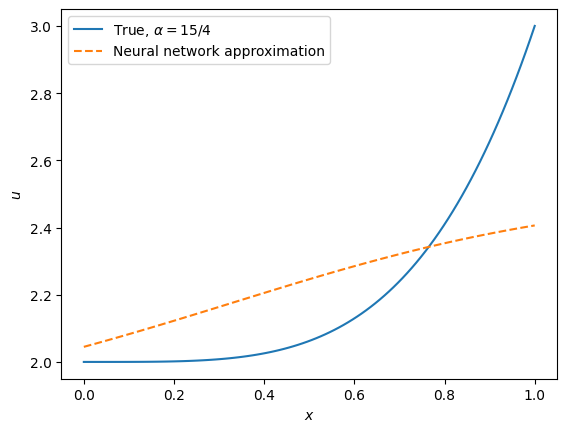

In [ ]:
N = nn.Sequential(
    nn.Linear(1,4),
    nn.Sigmoid(),
    nn.Linear(4,4),
    nn.Sigmoid(),
    nn.Linear(4,1)
    )
def loss(x):
    x.requires_grad = False
    outputs = N(x)
    pwl_spline = interpolate.splrep(X, N(X).detach().numpy())
    u_inter = lambda t:interpolate.splev(t, pwl_spline)
    du_inter = lambda t:interpolate.splev(t, pwl_spline,der=1)
    ddu_inter = lambda t:interpolate.splev(t, pwl_spline,der=2)
    Y = torch.tensor([T(X[i],u_inter,du_inter) for i in range(X.shape[0])],requires_grad=True).reshape(X.shape[0],1)
    return  torch.mean((outputs - Y)**2)

optimizer = torch.optim.Adam(N.parameters(),lr=0.01)

epochs = 500
for epoch in range(epochs):
    l = loss(X)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if epoch % (epochs*0.1)==0:
       print(f'Epoch: {epoch} | Loss: {l.item()}')

xx = np.linspace(0, 1, 100)[:, None]
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = ue(xx)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=15/4$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');

Epoch: 0 | Loss: 0.028927257284522057
Epoch: 100 | Loss: 0.010331571102142334
Epoch: 200 | Loss: 0.00105220393743366
Epoch: 300 | Loss: 0.0005925018340349197
Epoch: 400 | Loss: 0.0003589810221455991


<ipython-input-88-62f3ffd943e9>:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I5 = lambda t: -lmbda3/Gm(alpha-3)*(t/2)**(alpha-3)*quad(lambda s,t:(1-s)**(alpha-4)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]


Epoch: 500 | Loss: 0.00021114498667884618
Epoch: 600 | Loss: 0.00012009148485958576
Epoch: 700 | Loss: 6.635345926042646e-05
Epoch: 800 | Loss: 3.58289762516506e-05
Epoch: 900 | Loss: 2.124628736055456e-05


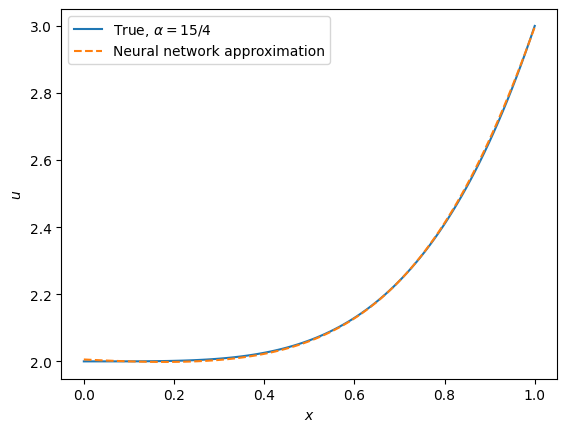

In [ ]:
optimizer = torch.optim.Adam(N.parameters(),lr=0.01)

epochs = 1000
for epoch in range(epochs):
    l = loss(X)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if epoch % (epochs*0.1)==0:
       print(f'Epoch: {epoch} | Loss: {l.item()}')

xx = np.linspace(0, 1, 100)[:, None]
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = ue(xx)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=15/4$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');

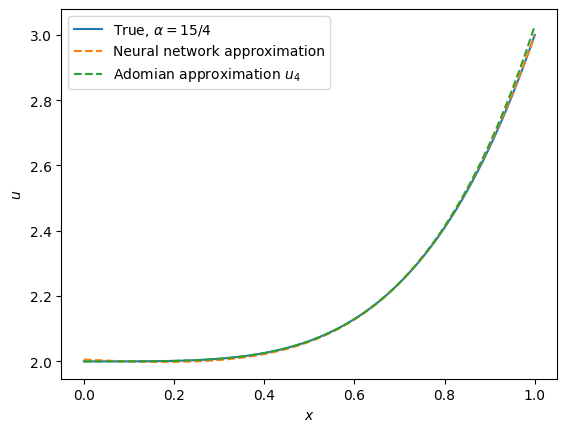

In [ ]:
xx = np.linspace(0, 1, 100)[:, None]
xxx = np.linspace(0, 1, 50)#[:, None]
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = ue(xx)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=15/4$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.plot(xxx, U_4,'--', label=r'Adomian approximation $u_4$')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');


# Example 7.(Example 14 in the article)

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy.special import gamma
from scipy.integrate import quad
from scipy import interpolate
import scipy as sc
from scipy.special import gamma
from scipy.interpolate import interp1d
from math import pi, sqrt
import tensorflow as tf

## check if GPU is available and use it; otherwise use CPU
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
#X = torch.Tensor(np.linspace(0, 2, 100)[:, None])
X = torch.Tensor(np.linspace(0, 1, 10)).reshape(10,1)

In [ ]:
# definition of problem functions
Gm = lambda x: gamma(x)
phi = lambda x: 6/Gm(1.5)*x**(1/2) + (12+3**(1/2))*x + np.sin(x) -3/10*np.exp(x)
f = lambda u,v,w: 6*(1+u)**(1/3) + (np.abs(v))**(1/2) + np.sin(w/6)
f1 = lambda u: 6*(np.abs(1+u))**(1/3)
f2 = lambda v: np.sqrt(np.abs(v))
f3 = lambda w:  np.sin(w/6)
K = lambda x,t: t*np.exp(x)
ue = lambda x: -1+x**3
due = lambda x: 3*x**2
ddue = lambda x: 6*x
# constants and parameters
alpha=5/2
d0 = -1;d1=0;d2=0;lmbda0=0;lmbda1=0;lmbda2=1;mu=1;a=0;b=1


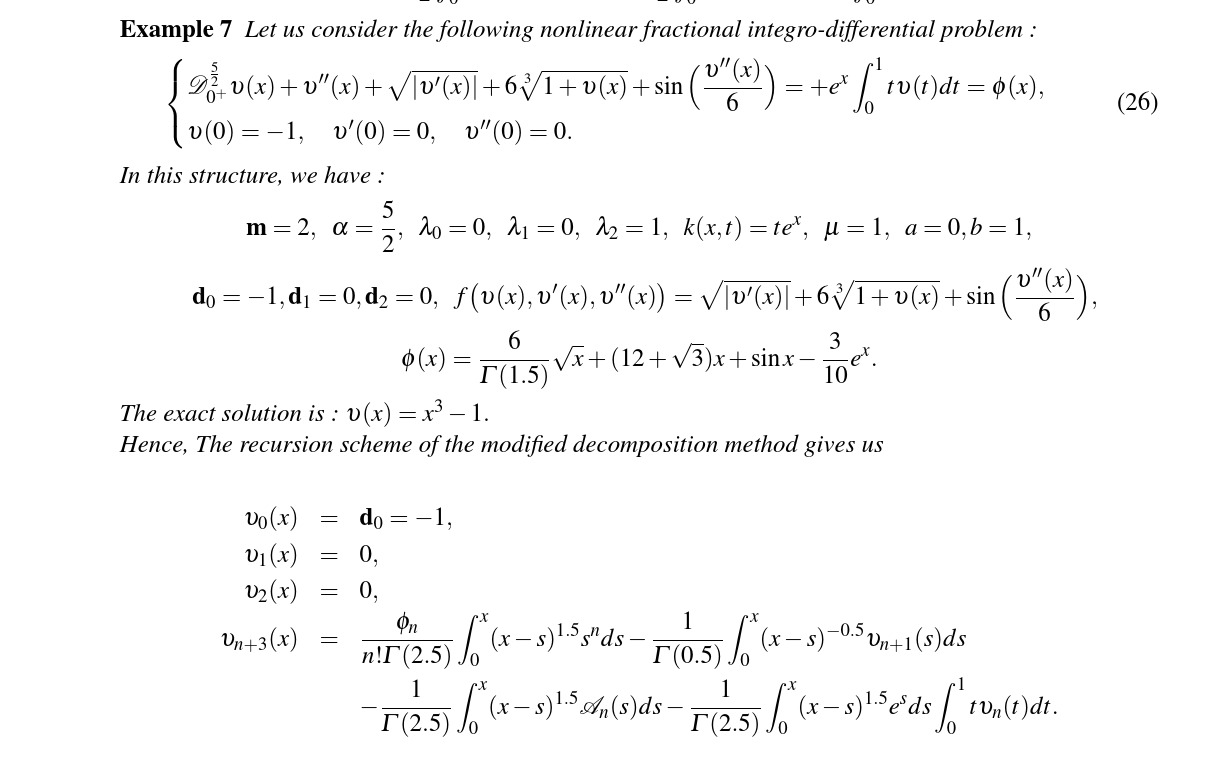

\begin{align}
\int_0^ts^{p-1}(t-s)^{q-1}f(s)ds &= \left(  \frac{t}{2} \right) ^{p+q-1} \int_{-1}^1 (1 + s)^{p-1} (1 - s )^{q-1} f\left( \frac{t}{2}(s+1)\right) ds\notag\\
&\approx \left(  \frac{t}{2} \right) ^{p+q-1}\sum_{i=1}^{n}\omega(x_i) f\left( \frac{t}{2}(x_i+1)\right).
\end{align}

In [ ]:
# definition of the operator T = I1 + I2 + I3 + I4
def T(t,u,v,w):
    I1 = lambda t: (1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*phi(s),0,t,args=(t))[0]
    I2 = lambda t:0 #-(lmbda0/(Gm(alpha)))*quad(lambda s,t:(t-s)**(alpha-1)*u(s),0,t,args=(t))[0]
    I3 = lambda t:0 #-(lmbda1/(Gm(alpha-1)))*quad(lambda s,t:(t-s)**(alpha-2)*(u(s)-d0),0,t,args=(t))[0]
    I4 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-2)*quad(lambda s,t:(1-s)**(alpha-3)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]
    I41 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-1)*quad(lambda s,t:(1-s)**(alpha-3)*(-d1*(s+1)),-1,1,args=(t))[0]
    g = lambda t: np.exp(t)*quad(lambda s: s*u(s),a,b)[0]
    I5 = lambda t:-(1/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*g(s),0,t,args=(t))[0]
    I61 = lambda t:-(mu/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)* f1(u(s)),0,t,args=(t))[0]
    I62 = lambda t:-(mu/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*f2(v(s)),0,t,args=(t))[0]
    I63 = lambda t:-(mu/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*f3(w(s)),0,t,args=(t))[0]
    I6 = lambda t:I61(t)+I62(t)+I63(t)
    #return d0 + d1*t + d2/2*t**2+ I1(t)  + I4(t)   + I5(t) + I6(t)
    return d0 + d1*t + d2/2*t**2+ I1(t) + I2(t) + I3(t) + I4(t) + I41(t)  + I5(t) + I6(t)

In [ ]:
F(1,ue,due,ddue)-ue(1)

6.1840532694645844e-12

### ANN approximation

Epoch: 0 | Loss: 0.12100778520107269


<ipython-input-24-f2734e60772a>:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I61 = lambda t:-(mu/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)* f1(u(s)),0,t,args=(t))[0]
<ipython-input-24-f2734e60772a>:6: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  I4 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-2)*quad(lambda s,t:(1-s)**(alpha-3)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]
<ipython-input-24-f2734e60772a>:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local diffi

Epoch: 200 | Loss: 0.016414105892181396


<ipython-input-24-f2734e60772a>:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I4 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-2)*quad(lambda s,t:(1-s)**(alpha-3)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]


Epoch: 400 | Loss: 0.000770791491959244


<ipython-input-24-f2734e60772a>:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I61 = lambda t:-(mu/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)* f1(u(s)),0,t,args=(t))[0]


Epoch: 600 | Loss: 0.00011168296623509377
Epoch: 800 | Loss: 0.00011035583156626672
Epoch: 1000 | Loss: 0.00010916120663750917
Epoch: 1200 | Loss: 0.00010808741353685036
Epoch: 1400 | Loss: 0.00010707807814469561
Epoch: 1600 | Loss: 0.00010606786236166954
Epoch: 1800 | Loss: 0.00010498265328351408


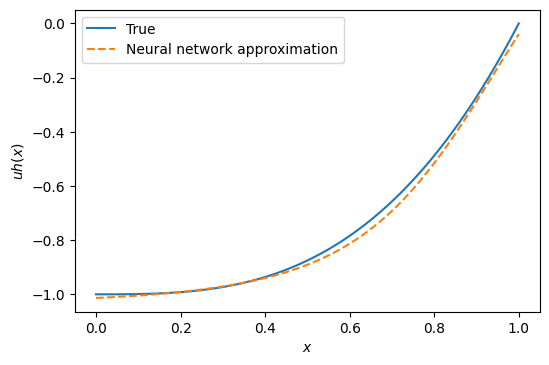

In [ ]:
N = nn.Sequential(
    nn.Linear(1,4),
    nn.Sigmoid(),
    nn.Linear(4,4),
    nn.Sigmoid(),
    nn.Linear(4,1)
    )
def loss(x):
    x.requires_grad = False
    outputs = N(x)
    pwl_spline = interpolate.splrep(X, N(X).detach().numpy())
    u_inter = lambda t:interpolate.splev(t, pwl_spline)
    du_inter = lambda t:interpolate.splev(t, pwl_spline,der=1)
    ddu_inter = lambda t:interpolate.splev(t, pwl_spline,der=2)
    Y = torch.tensor([T(X[i],u_inter,du_inter,ddu_inter) for i in range(X.shape[0])],requires_grad=True).reshape(X.shape[0],1)
    return  torch.mean((outputs - Y)**2)

optimizer = torch.optim.Adam(N.parameters(),lr=0.01)

epochs = 2000
for epoch in range(epochs):
    l = loss(X)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if epoch % (epochs*0.1)==0:
       print(f'Epoch: {epoch} | Loss: {l.item()}')

xx = np.linspace(0, 1, 100)[:, None]
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = -1+xx**3
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=5/2$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');

In [ ]:
optimizer = torch.optim.Adam(N.parameters(),lr=0.01)

epochs = 1000
for epoch in range(epochs):
    l = loss(X)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if epoch % (epochs*0.1)==0:
       print(f'Epoch: {epoch} | Loss: {l.item()}')

<ipython-input-24-f2734e60772a>:12: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I63 = lambda t:-(mu/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)*f3(w(s)),0,t,args=(t))[0]


Epoch: 0 | Loss: 0.00010374376142863184


<ipython-input-24-f2734e60772a>:6: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I4 = lambda t: -lmbda2/Gm(alpha-2)*(t/2)**(alpha-2)*quad(lambda s,t:(1-s)**(alpha-3)*(u(t/2*(s+1))-d0),-1,1,args=(t))[0]
<ipython-input-24-f2734e60772a>:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I61 = lambda t:-(mu/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)* f1(u(s)),0,t,args=(t))[0]


Epoch: 100 | Loss: 0.00010247946192976087


<ipython-input-24-f2734e60772a>:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I61 = lambda t:-(mu/Gm(alpha))*quad(lambda s,t: (t-s)**(alpha-1)* f1(u(s)),0,t,args=(t))[0]


Epoch: 200 | Loss: 0.00010211138578597456
Epoch: 300 | Loss: 0.00010179225500905886
Epoch: 400 | Loss: 0.00010141172970179468
Epoch: 500 | Loss: 0.00010096591722685844
Epoch: 600 | Loss: 0.00010045941598946229
Epoch: 700 | Loss: 9.989084355765954e-05
Epoch: 800 | Loss: 9.925779886543751e-05
Epoch: 900 | Loss: 9.855988901108503e-05


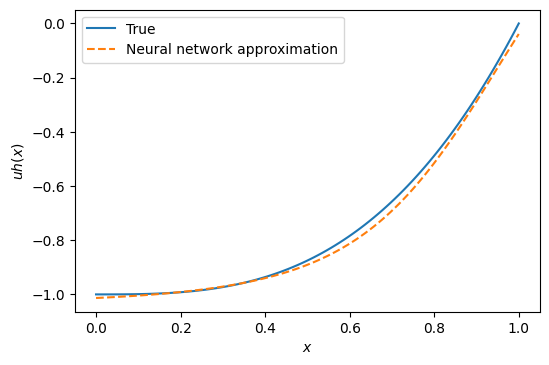

In [ ]:
xx = np.linspace(0, 1, 100)[:, None]
uh = lambda x: N(x)
with torch.no_grad():
    yy = uh(torch.Tensor(xx)).numpy()
yt = -1+xx**3
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label=r'True, $\alpha=5/2$')
ax.plot(xx, yy,'--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.legend(loc='best');